In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x3)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3, 3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x3)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)



flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)


x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewestofall.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labelsnewestofall.npy",labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x3)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x3)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


x6 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x6 = BatchNormalization()(x3)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


flatten_layer = Flatten()(x6)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewestofall.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewestofall.npy",labels)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 128, 64)         1792      ['input_6[0][0]']             
                                                                                            

ValueError: in user code:

    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 224, 224, 3)


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewestofall.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewestofall.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewestofall.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



Epoch 1/200
118/118 [==============================] - 46s 230ms/step - loss: 2.2484 - accuracy: 0.2299 - val_loss: 4.3260 - val_accuracy: 0.1333
Epoch 2/200
118/118 [==============================] - 21s 175ms/step - loss: 1.4941 - accuracy: 0.4629 - val_loss: 2.4364 - val_accuracy: 0.3548
Epoch 3/200
118/118 [==============================] - 21s 175ms/step - loss: 0.8932 - accuracy: 0.6859 - val_loss: 1.1868 - val_accuracy: 0.5738
Epoch 4/200
118/118 [==============================] - 21s 176ms/step - loss: 0.4846 - accuracy: 0.8440 - val_loss: 0.8887 - val_accuracy: 0.6881
Epoch 5/200
118/118 [==============================] - 21s 179ms/step - loss: 0.2917 - accuracy: 0.9153 - val_loss: 1.1658 - val_accuracy: 0.6714
Epoch 6/200
118/118 [==============================] - 21s 179ms/step - loss: 0.2211 - accuracy: 0.9362 - val_loss: 0.6785 - val_accuracy: 0.7595
Epoch 7/200
118/118 [==============================] - 22s 184ms/step - loss: 0.1416 - accuracy: 0.9595 - val_loss: 1.1335 -

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test01combined.h5


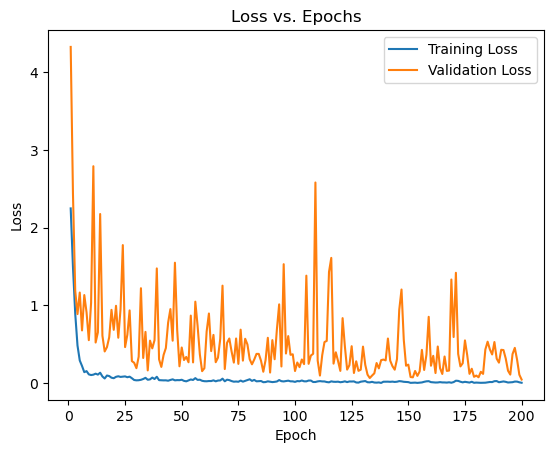

14/14 [==============================] - 0s 9ms/step
Accuracy: 0.9912142857142858
Average Precision: 0.9919047385620916
Average Recall: 0.99142857142858
Average F1-score: 0.9912009784537096


In [13]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


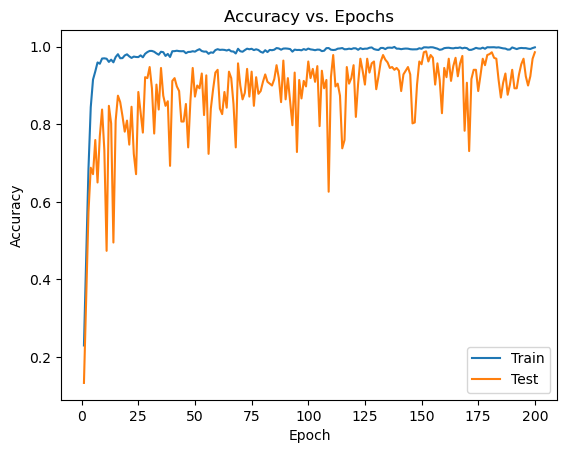

In [15]:
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


In [5]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200


118/118 [==============================] - 12s 73ms/step - loss: 2.2217 - accuracy: 0.2442 - val_loss: 4.6048 - val_accuracy: 0.1857
Epoch 2/200
118/118 [==============================] - 8s 70ms/step - loss: 1.4263 - accuracy: 0.4833 - val_loss: 2.4469 - val_accuracy: 0.2881
Epoch 3/200
118/118 [==============================] - 8s 70ms/step - loss: 0.8324 - accuracy: 0.7243 - val_loss: 1.1885 - val_accuracy: 0.5714
Epoch 4/200
118/118 [==============================] - 8s 70ms/step - loss: 0.5040 - accuracy: 0.8340 - val_loss: 1.2591 - val_accuracy: 0.6143
Epoch 5/200
118/118 [==============================] - 8s 70ms/step - loss: 0.2749 - accuracy: 0.9206 - val_loss: 0.7580 - val_accuracy: 0.7595
Epoch 6/200
118/118 [==============================] - 8s 71ms/step - loss: 0.1792 - accuracy: 0.9470 - val_loss: 1.0456 - val_accuracy: 0.7071
Epoch 7/200
118/118 [==============================] - 8s 71ms/step - loss: 0.2069 - accuracy: 0.9333 - val_loss: 1.3341 - val_accura

In [1]:

import os
import random
import sys
import glob
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
import plotly.offline as py

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
py.init_notebook_mode(connected=True)

COMBINED

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [3]:
print(X_train_co.shape)

(3776, 36, 18, 256)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01combinedfinaltouch.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


Epoch 1/200


118/118 [==============================] - 16s 92ms/step - loss: 2.2933 - accuracy: 0.2127 - val_loss: 7.1396 - val_accuracy: 0.1190
Epoch 2/200
118/118 [==============================] - 10s 83ms/step - loss: 1.7121 - accuracy: 0.3700 - val_loss: 2.0481 - val_accuracy: 0.3476
Epoch 3/200
118/118 [==============================] - 10s 82ms/step - loss: 1.2137 - accuracy: 0.5585 - val_loss: 1.3244 - val_accuracy: 0.5786
Epoch 4/200
118/118 [==============================] - 10s 83ms/step - loss: 0.8465 - accuracy: 0.7034 - val_loss: 1.7967 - val_accuracy: 0.5119
Epoch 5/200
118/118 [==============================] - 10s 82ms/step - loss: 0.5813 - accuracy: 0.8008 - val_loss: 1.1434 - val_accuracy: 0.6452
Epoch 6/200
118/118 [==============================] - 10s 83ms/step - loss: 0.3919 - accuracy: 0.8671 - val_loss: 0.7133 - val_accuracy: 0.7690
Epoch 7/200
118/118 [==============================] - 10s 82ms/step - loss: 0.3195 - accuracy: 0.8930 - val_loss: 2.2819 - val_

14/14 [==============================] - 1s 12ms/step
Accuracy: 0.9809523809523809
Average Precision: 0.981444827413922
Average Recall: 0.9809523809523809
Average F1-score: 0.9809499685013485


In [9]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01combinedfinaltouchsmall.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


Epoch 1/200
118/118 [==============================] - 13s 73ms/step - loss: 1.9144 - accuracy: 0.3175 - val_loss: 6.4123 - val_accuracy: 0.1190
Epoch 2/200
118/118 [==============================] - 8s 70ms/step - loss: 1.0457 - accuracy: 0.6221 - val_loss: 2.2026 - val_accuracy: 0.3905
Epoch 3/200
118/118 [==============================] - 8s 69ms/step - loss: 0.5025 - accuracy: 0.8324 - val_loss: 1.7504 - val_accuracy: 0.5786
Epoch 4/200
118/118 [==============================] - 9s 75ms/step - loss: 0.2758 - accuracy: 0.9147 - val_loss: 2.2864 - val_accuracy: 0.4571
Epoch 5/200
118/118 [==============================] - 9s 73ms/step - loss: 0.1804 - accuracy: 0.9417 - val_loss: 0.5927 - val_accuracy: 0.8238
Epoch 6/200
118/118 [==============================] - 9s 74ms/step - loss: 0.1335 - accuracy: 0.9547 - val_loss: 0.5330 - val_accuracy: 0.8262
Epoch 7/200
118/118 [==============================] - 9s 74ms/step - loss: 0.0968 - accuracy: 0.9717 - val_loss: 0.8939 - val_accuracy

14/14 [==============================] - 0s 9ms/step
Accuracy: 0.9761904761904762
Average Precision: 0.9771139358154283
Average Recall: 0.9761904761904762
Average F1-score: 0.9762119423487479


In [6]:
class AugmentedSpectrograms():
    def __init__(self, df, outputpath, mel=True, mfcc=False, spectral=False, mfccbanks=20, n_mels=128):
        self.df = df
        self.mel = mel
        self.mfcc = mfcc
        self.spectral = spectral
        self.mfccbanks = mfccbanks
        self.n_mels = n_mels
        self.outputpath = outputpath

    def get_augmented_spectrograms(self):
        for index, row in tqdm(self.df.iterrows(), total=self.df.shape[0]):
            emotion = row['label']
            path = os.path.join(self.outputpath, emotion)

            if not os.path.exists(path):
                os.makedirs(path)

            x, sample_rate = librosa.load(row['path'])
            original_filename = f'{emotion}_{index + 1}'
            self.generate_augmented_spectrogram(x, sample_rate, path, original_filename)
            self.generate_augmented_spectrogram(x, sample_rate, path, original_filename)

    def generate_augmented_spectrogram(self, x, sample_rate, path, original_filename):
        if self.mel:
            mel_features = librosa.feature.melspectrogram(y=x, sr=sample_rate, n_mels=self.n_mels)
            log_mel_features = librosa.power_to_db(mel_features, ref=np.max)

            # Apply SpecAugment to the mel spectrogram
            for _ in range(2):  # Generate 2 augmented samples
                augmented_spec = spec_augment(log_mel_features)

                # Save the augmented mel spectrogram
                self.save_spectrogram(augmented_spec, sample_rate, path, original_filename)

    def save_spectrogram(self, features, sample_rate, path, original_filename):
        fig = plt.figure(figsize=(12, 4))
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        librosa.display.specshow(features, sr=sample_rate, x_axis='time', y_axis='mel')

        save_path = os.path.join(path, f'{original_filename}.jpg')
        plt.savefig(save_path)
        plt.close()

# Example usage for generating augmented spectrograms
outputpath = r"C:\Users\adwit\Downloads\specti-new"  # Change this to the desired output path
augmented_spectrogram_generator = AugmentedSpectrograms(df, outputpath=outputpath, mel=True, mfcc=False, spectral=False)

# Generate augmented spectrograms
augmented_spectrogram_generator.get_augmented_spectrograms()


100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [08:51<00:00,  2.71it/s]


In [32]:
import os

def count_images(directory):
    total_images = 0
    subdirectories = []

    # Iterate over all items in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # If it's a file and has an image extension, count it
        if os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
        # If it's a directory, add it to the subdirectories list
        elif os.path.isdir(item_path):
            subdirectories.append(item)

    # Recursively count images in subdirectories
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return total_images

def count_shape_of_directory(directory):
    subdirectories = []
    total_images = 0

    # Iterate over all items in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # If it's a directory, add it to the subdirectories list
        if os.path.isdir(item_path):
            subdirectories.append(item)
        elif os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return len(subdirectories), total_images
directory_path = r'C:\Users\adwit\Downloads\specti-newaug'
num_subdirectories, total_images = count_shape_of_directory(directory_path)
print(f"Number of subdirectories: {num_subdirectories}")
print(f"Total number of images: {total_images}")


Number of subdirectories: 8
Total number of images: 4196


In [3]:
import os
import pandas as pd

def metadata(basepath):
    df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender', 'intensity', 'statement', 'repetition', 'emotion'])
    count = 0

    for sub_dir in os.listdir(basepath):
        sub_dir_path = os.path.join(basepath, sub_dir)

        if os.path.isdir(sub_dir_path):
            for f in os.listdir(sub_dir_path):
                filename = f.split('.')[0].split('-')
                if len(filename) == 7:
                    path = os.path.join(sub_dir_path, f)
                    src = int(filename[1])
                    actor = int(filename[-1].split()[0])  # Extract actor removing extra characters
                    emotion = int(filename[2])
                    gender = "female" if int(actor) % 2 == 0 else "male"
                    intensity = 0 if filename[3] == '01' else 1
                    statement = 0 if filename[4] == '01' else 1
                    repeat = 0 if filename[5] == '01' else 1

                    df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
                    count += 1

    labels = []
    for i in range(len(df)):
        if df.emotion[i] == 1:
            label = "1"
        elif df.emotion[i] == 2:
            label = "2"
        elif df.emotion[i] == 3:
            label = "3"
        elif df.emotion[i] == 4:
            label = "4"
        elif df.emotion[i] == 5:
            label = "5"
        elif df.emotion[i] == 6:
            label = "6"
        elif df.emotion[i] == 7:
            label = "7"
        elif df.emotion[i] == 8:
            label = "8"
        else:
            label = "_none"

        labels.append(label)

    df['label'] = labels
    return df

# Example usage
basepath = r"C:\Users\adwit\Downloads\audio_speech_actors_01-24"
df = metadata(basepath)
print(df.head())


                                                path  source  actor gender  \
0  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
1  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
2  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
3  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
4  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   

   intensity  statement  repetition  emotion label  
0          0          0           0        1     1  
1          0          0           1        1     1  
2          0          1           0        1     1  
3          0          1           1        1     1  
4          0          0           0        2     2  


In [5]:
def spec_augment(spec: np.ndarray, num_mask=1,
                 freq_masking_max_percentage=0.10, time_masking_max_percentage=0.15):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0, freq_masking_max_percentage)

        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0.000

        time_percentage = random.uniform(0.0, time_masking_max_percentage)

        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0.000

    return spec

In [19]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



MemoryError: Unable to allocate 3.07 GiB for an array with shape (4196, 256, 256, 3) and data type float32

In [34]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (256,256, 3)
#sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

input_layer = Input(shape=input_shape)

x = model(input_layer)

concatenated_input = Concatenate()([x, x])
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(concatenated_input)
model_top = Model(inputs=input_layer, outputs=output_layer)
model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, 128)                  3152748   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 concatenate_3 (Concatenate  (None, 256)                  0         ['sequential_3[0][0]',        
 )                                                                   'sequential_3[0][0]']        
                                                                                            

In [4]:

model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


118/118 [==============================] - 64s 511ms/step - loss: 2.4595 - accuracy: 0.2418 - val_loss: 1.9633 - val_accuracy: 0.3000
Epoch 2/20
118/118 [==============================] - 82s 699ms/step - loss: 1.5315 - accuracy: 0.4550 - val_loss: 1.3179 - val_accuracy: 0.5524
Epoch 3/20
118/118 [==============================] - 99s 835ms/step - loss: 0.9150 - accuracy: 0.6745 - val_loss: 2.0902 - val_accuracy: 0.4000
Epoch 4/20
118/118 [==============================] - 97s 820ms/step - loss: 0.4797 - accuracy: 0.8445 - val_loss: 0.5496 - val_accuracy: 0.8167
Epoch 5/20
118/118 [==============================] - 91s 773ms/step - loss: 0.2429 - accuracy: 0.9261 - val_loss: 0.1531 - val_accuracy: 0.9714
Epoch 6/20
118/118 [==============================] - 88s 747ms/step - loss: 0.1505 - accuracy: 0.9568 - val_loss: 0.0794 - val_accuracy: 0.9786
Epoch 7/20
118/118 [==============================] - 91s 775ms/step - loss: 0.0807 - accuracy: 0.9783 - val_loss: 0.0850 - val_

In [5]:
# Evaluate the model
loss, accuracy = model_top.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

14/14 [==============================] - 2s 108ms/step - loss: 0.0628 - accuracy: 0.9810
Test Loss: 0.0628
Test Accuracy: 0.9810


Chromagrams

In [6]:

import os
import random
import sys
import glob
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
import plotly.offline as py

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
py.init_notebook_mode(connected=True)

In [7]:
import os
import pandas as pd

def metadata(basepath):
    df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender', 'intensity', 'statement', 'repetition', 'emotion'])
    count = 0

    for sub_dir in os.listdir(basepath):
        sub_dir_path = os.path.join(basepath, sub_dir)

        if os.path.isdir(sub_dir_path):
            for f in os.listdir(sub_dir_path):
                filename = f.split('.')[0].split('-')
                if len(filename) == 7:
                    path = os.path.join(sub_dir_path, f)
                    src = int(filename[1])
                    actor = int(filename[-1].split()[0])  # Extract actor removing extra characters
                    emotion = int(filename[2])
                    gender = "female" if int(actor) % 2 == 0 else "male"
                    intensity = 0 if filename[3] == '01' else 1
                    statement = 0 if filename[4] == '01' else 1
                    repeat = 0 if filename[5] == '01' else 1

                    df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
                    count += 1

    labels = []
    for i in range(len(df)):
        if df.emotion[i] == 1:
            label = "1"
        elif df.emotion[i] == 2:
            label = "2"
        elif df.emotion[i] == 3:
            label = "3"
        elif df.emotion[i] == 4:
            label = "4"
        elif df.emotion[i] == 5:
            label = "5"
        elif df.emotion[i] == 6:
            label = "6"
        elif df.emotion[i] == 7:
            label = "7"
        elif df.emotion[i] == 8:
            label = "8"
        else:
            label = "_none"

        labels.append(label)

    df['label'] = labels
    return df

# Example usage
basepath = r"C:\Users\adwit\Downloads\audio_speech_actors_01-24"
df = metadata(basepath)
print(df.head())


                                                path  source  actor gender  \
0  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
1  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
2  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
3  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   
4  C:\Users\adwit\Downloads\audio_speech_actors_0...       1      1   male   

   intensity  statement  repetition  emotion label  
0          0          0           0        1     1  
1          0          0           1        1     1  
2          0          1           0        1     1  
3          0          1           1        1     1  
4          0          0           0        2     2  


In [16]:
class Spectrograms():
    def __init__(self, df, outputpath, sample=False, augmentation=False, mel=False, mfcc=False, spectral=False, chroma=False, mfccbanks=20, n_mels=128):
        self.df = df
        self.augmentation = augmentation
        self.mel = mel
        self.mfcc = mfcc
        self.spectral = spectral
        self.chroma = chroma
        self.mfccbanks = mfccbanks
        self.n_mels = n_mels
        self.outputpath = outputpath
        self.sample = sample

    def get_spectrograms(self):
        if self.sample:
            x, sample_rate = librosa.load(self.df['path'].iloc[0])
            self.generate(x, sample_rate, '', 0, self.df['label'].iloc[0])

        else:
            for index, row in tqdm(self.df.iterrows(), total=self.df.shape[0]):
                emotion = row['label']
                path = os.path.join(self.outputpath, emotion)

                if not os.path.exists(path):
                    os.makedirs(path)

                x, sample_rate = librosa.load(row['path'])
                self.generate(x, sample_rate, path, index, emotion)

    def generate(self, x, sample_rate, path, count, emotion):
        if self.mel:
            mel_features = librosa.feature.melspectrogram(y=x, sr=sample_rate, n_mels=self.n_mels)
            log_mel_features = librosa.power_to_db(mel_features, ref=np.max)
            fig = plt.figure(figsize=(12, 4))
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            librosa.display.specshow(log_mel_features, sr=sample_rate, x_axis='time', y_axis='mel')
            if self.sample:
                plt.show()
            else:
                plt.savefig(os.path.join(path, f'{emotion}_{count}_mel.jpg'))
                plt.close()

        if self.mfcc:
            mfcc_features = librosa.feature.mfcc(x, sr=sample_rate, n_mfcc=self.mfccbanks)
            fig = plt.figure(figsize=(12, 4))
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            librosa.display.specshow(mfcc_features, sr=sample_rate, x_axis='time', y_axis='mel')
            if self.sample:
                plt.show()
            else:
                plt.savefig(os.path.join(path, f'{emotion}_{count}_mfcc.jpg'))
                plt.close()

        if self.spectral:
            spectral_features = librosa.feature.spectral_contrast(x, sr=sample_rate)
            fig = plt.figure(figsize=(12, 4))
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            librosa.display.specshow(spectral_features, sr=sample_rate, x_axis='time', y_axis='mel')
            if self.sample:
                plt.show()
            else:
                plt.savefig(os.path.join(path, f'{emotion}_{count}_spectral.jpg'))
                plt.close()

        if self.chroma:
            chroma_features = librosa.feature.chroma_stft(y=x, sr=sample_rate)
            fig = plt.figure(figsize=(12, 4))
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            librosa.display.specshow(chroma_features, sr=sample_rate, x_axis='time', y_axis='chroma')
            if self.sample:
                plt.show()
            else:
                plt.savefig(os.path.join(path, f'{emotion}_{count}.jpg'))
                plt.close()


In [18]:
spectrogram_generator = Spectrograms(df, outputpath=r"C:\Users\adwit\Downloads\chroma-augm", sample=False,chroma=True)
spectrogram_generator.get_spectrograms()

100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [01:44<00:00, 13.77it/s]


In [19]:
import os

def count_images(directory):
    total_images = 0
    subdirectories = []

    # Iterate over all items in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # If it's a file and has an image extension, count it
        if os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
        # If it's a directory, add it to the subdirectories list
        elif os.path.isdir(item_path):
            subdirectories.append(item)

    # Recursively count images in subdirectories
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return total_images

def count_shape_of_directory(directory):
    subdirectories = []
    total_images = 0

    # Iterate over all items in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # If it's a directory, add it to the subdirectories list
        if os.path.isdir(item_path):
            subdirectories.append(item)
        elif os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return len(subdirectories), total_images
directory_path = r"C:\Users\adwit\Downloads\chroma-augm"
num_subdirectories, total_images = count_shape_of_directory(directory_path)
print(f"Number of subdirectories: {num_subdirectories}")
print(f"Total number of images: {total_images}")


Number of subdirectories: 8
Total number of images: 1440


In [13]:
from PIL import Image

def load_chromagram(chromagram_path):
    """
    Load the chromagram from the given JPEG file path.
    """
    chromagram = Image.open(chromagram_path)
    return chromagram

def save_chromagram(chromagram, chromagram_path):
    """
    Save the chromagram image to the given JPEG file path.
    """
    chromagram.save(chromagram_path)



In [14]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

class ChromagramAugmentation():
    def __init__(self, chromagram_dir, noise_mean=0, noise_std=0.005):
        self.chromagram_dir = chromagram_dir
        self.noise_mean = noise_mean
        self.noise_std = noise_std

    def augment_with_noise(self):
        num_original_chromagrams = 1450  # Update this with your actual number of original chromagrams
        desired_total_chromagrams = 4196
        num_augmentations_needed = desired_total_chromagrams - num_original_chromagrams

        for emotion_dir in os.listdir(self.chromagram_dir):
            emotion_path = os.path.join(self.chromagram_dir, emotion_dir)
            if os.path.isdir(emotion_path):
                chromagram_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

                for idx, chromagram_file in tqdm(enumerate(chromagram_files), total=num_original_chromagrams, desc=emotion_dir):
                    chromagram_path = os.path.join(emotion_path, chromagram_file)
                    chromagram = load_chromagram(chromagram_path)

                    # Calculate how many times to augment this chromagram
                    num_augmentations = int(np.ceil(num_augmentations_needed / num_original_chromagrams))

                    # Augment the chromagram
                    for i in range(num_augmentations):
                        augmented_chromagram = self.add_noise_to_chromagram(chromagram)

                        # Determine the new index for augmented chromagrams
                        new_index = num_original_chromagrams + idx * num_augmentations + i + 1

                        # Save the augmented chromagram
                        augmented_chromagram_filename = f"{emotion_dir}_{new_index}.jpg"
                        augmented_chromagram_path = os.path.join(emotion_path, augmented_chromagram_filename)
                        save_chromagram(augmented_chromagram, augmented_chromagram_path)

                        num_augmentations_needed -= 1
                        if num_augmentations_needed == 0:
                            break

                    if num_augmentations_needed == 0:
                        break

    def add_noise_to_chromagram(self, chromagram):
        width, height = chromagram.size
        noise = np.random.normal(self.noise_mean, self.noise_std, (height, width, 3))
        noisy_chromagram_array = np.array(chromagram) + noise
        noisy_chromagram_array = np.clip(noisy_chromagram_array, 0, 255).astype(np.uint8)
        return Image.fromarray(noisy_chromagram_array)

chromagram_dir = r"C:\Users\adwit\Downloads\chromagrams"
augmenter = ChromagramAugmentation(chromagram_dir)
augmenter.augment_with_noise()


8:  13%|██████████                                                                  | 192/1450 [00:17<01:52, 11.17it/s]


In [22]:
import os

def count_images(directory):
    total_images = 0
    subdirectories = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
        elif os.path.isdir(item_path):
            subdirectories.append(item)
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return total_images

def count_shape_of_directory(directory):
    subdirectories = []
    total_images = 0
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            subdirectories.append(item)
        elif os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            total_images += 1
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        total_images += count_images(subdir_path)

    return len(subdirectories), total_images
directory_path = r"C:\Users\adwit\Downloads\chroma-augm"
num_subdirectories, total_images = count_shape_of_directory(directory_path)
print(f"Number of subdirectories: {num_subdirectories}")
print(f"Total number of images: {total_images}")


Number of subdirectories: 8
Total number of images: 4196


In [20]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

class ChromagramAugmentation():
    def __init__(self, chromagram_dir, noise_mean=0, noise_std=0.005):
        self.chromagram_dir = chromagram_dir
        self.noise_mean = noise_mean
        self.noise_std = noise_std

    def augment_with_noise(self):
        target_total_samples = 4196
        original_samples = 1440
        augmented_samples_needed = target_total_samples - original_samples
        current_total_samples = 0

        for emotion_dir in os.listdir(self.chromagram_dir):
            emotion_path = os.path.join(self.chromagram_dir, emotion_dir)
            if os.path.isdir(emotion_path):
                chromagram_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]
                num_original_chromagrams = len(chromagram_files)

                for idx, chromagram_file in tqdm(enumerate(chromagram_files), total=num_original_chromagrams, desc=emotion_dir):
                    chromagram_path = os.path.join(emotion_path, chromagram_file)
                    chromagram = load_chromagram(chromagram_path)

                    # Determine how many times to augment this chromagram
                    num_augmentations = min(2, int(np.ceil(augmented_samples_needed / num_original_chromagrams)))

                    for i in range(num_augmentations):
                        augmented_chromagram = self.add_noise_to_chromagram(chromagram)
                        new_index = original_samples + current_total_samples + i + 1
                        augmented_chromagram_filename = f"{emotion_dir}_{new_index}.jpg"
                        augmented_chromagram_path = os.path.join(emotion_path, augmented_chromagram_filename)
                        save_chromagram(augmented_chromagram, augmented_chromagram_path)

                    current_total_samples += num_augmentations
                    if current_total_samples >= augmented_samples_needed:
                        break

                if current_total_samples >= augmented_samples_needed:
                    break

    def add_noise_to_chromagram(self, chromagram):
        width, height = chromagram.size
        noise = np.random.normal(self.noise_mean, self.noise_std, (height, width, 3))
        noisy_chromagram_array = np.array(chromagram) + noise
        noisy_chromagram_array = np.clip(noisy_chromagram_array, 0, 255).astype(np.uint8)
        return Image.fromarray(noisy_chromagram_array)

# Example usage
chromagram_dir = r"C:\Users\adwit\Downloads\chroma-augm"
augmenter = ChromagramAugmentation(chromagram_dir)
augmenter.augment_with_noise()


8:  67%|███████████████████████████████████████████████████▋                         | 129/192 [00:24<00:12,  5.19it/s]


In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [28]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (256,256, 3)
#sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

input_layer = Input(shape=input_shape)

x = model(input_layer)

concatenated_input = Concatenate()([x, x])
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(concatenated_input)
model_top = Model(inputs=input_layer, outputs=output_layer)
model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 128)                  3152748   ['input_3[0][0]']             
                                                          8                                       
                                                                                                  
 concatenate_2 (Concatenate  (None, 256)                  0         ['sequential_2[0][0]',        
 )                                                                   'sequential_2[0][0]']        
                                                                                            

In [26]:

model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
118/118 [==============================] - 75s 590ms/step - loss: 2.1899 - accuracy: 0.3006 - val_loss: 2.5582 - val_accuracy: 0.3000
Epoch 2/20
118/118 [==============================] - 82s 692ms/step - loss: 1.2067 - accuracy: 0.5773 - val_loss: 0.7987 - val_accuracy: 0.7762
Epoch 3/20
118/118 [==============================] - 105s 888ms/step - loss: 0.5317 - accuracy: 0.8247 - val_loss: 0.5625 - val_accuracy: 0.7952
Epoch 4/20
118/118 [==============================] - 92s 778ms/step - loss: 0.2622 - accuracy: 0.9219 - val_loss: 0.1105 - val_accuracy: 0.9714
Epoch 5/20
118/118 [==============================] - 90s 763ms/step - loss: 0.1562 - accuracy: 0.9571 - val_loss: 0.3016 - val_accuracy: 0.9000
Epoch 6/20
118/118 [==============================] - 90s 759ms/step - loss: 0.1185 - accuracy: 0.9635 - val_loss: 0.0298 - val_accuracy: 0.9857
Epoch 7/20
118/118 [==============================] - 100s 847ms/step - loss: 0.0825 - accuracy: 0.9759 - val_loss: 0.0148 - val_

In [29]:

model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
118/118 [==============================] - 66s 505ms/step - loss: 2.2280 - accuracy: 0.2916 - val_loss: 1.9266 - val_accuracy: 0.3286
Epoch 2/30
118/118 [==============================] - 77s 652ms/step - loss: 1.1153 - accuracy: 0.6067 - val_loss: 0.7678 - val_accuracy: 0.7786
Epoch 3/30
118/118 [==============================] - 103s 874ms/step - loss: 0.5398 - accuracy: 0.8189 - val_loss: 0.3937 - val_accuracy: 0.8905
Epoch 4/30
118/118 [==============================] - 90s 761ms/step - loss: 0.2702 - accuracy: 0.9171 - val_loss: 0.3123 - val_accuracy: 0.9167
Epoch 5/30
118/118 [==============================] - 93s 789ms/step - loss: 0.1615 - accuracy: 0.9537 - val_loss: 0.0276 - val_accuracy: 0.9976
Epoch 6/30
118/118 [==============================] - 100s 848ms/step - loss: 0.1148 - accuracy: 0.9688 - val_loss: 0.0189 - val_accuracy: 0.9952
Epoch 7/30
118/118 [==============================] - 105s 888ms/step - loss: 0.0683 - accuracy: 0.9833 - val_loss: 0.0167 - val

Spectograms-100 epochs

In [35]:

model_top.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_top.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
118/118 [==============================] - 71s 538ms/step - loss: 2.3034 - accuracy: 0.2712 - val_loss: 2.1579 - val_accuracy: 0.3024
Epoch 2/100
118/118 [==============================] - 81s 691ms/step - loss: 1.3535 - accuracy: 0.5119 - val_loss: 1.2492 - val_accuracy: 0.5619
Epoch 3/100
118/118 [==============================] - 103s 877ms/step - loss: 0.8321 - accuracy: 0.6976 - val_loss: 0.7719 - val_accuracy: 0.7333
Epoch 4/100
118/118 [==============================] - 95s 802ms/step - loss: 0.5167 - accuracy: 0.8281 - val_loss: 27.1038 - val_accuracy: 0.1548
Epoch 5/100
118/118 [==============================] - 100s 849ms/step - loss: 0.6724 - accuracy: 0.7680 - val_loss: 1.3887 - val_accuracy: 0.6333
Epoch 6/100
118/118 [==============================] - 93s 789ms/step - loss: 0.3018 - accuracy: 0.9020 - val_loss: 0.5234 - val_accuracy: 0.7976
Epoch 7/100
118/118 [==============================] - 90s 760ms/step - loss: 0.1538 - accuracy: 0.9539 - val_loss: 0.110

In [36]:
# Evaluate the model
loss, accuracy = model_top.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

14/14 [==============================] - 1s 99ms/step - loss: 0.0073 - accuracy: 0.9952
Test Loss: 0.0073
Test Accuracy: 0.9952


Concatenating outputs from two different layers

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



MemoryError: Unable to allocate 3.07 GiB for an array with shape (4196, 256, 256, 3) and data type float32

In [40]:


from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (150, 150, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu')(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu')(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 148, 148, 32)         896       ['input_7[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 148, 148, 64)         1792      ['input_8[0][0]']             
                                                                                            

In [41]:
# Train the model
model.fit([X_train, X_train], y_train, batch_size=32, epochs=50, validation_data=([X_test, X_test], y_test))

Epoch 1/50
118/118 [==============================] - 77s 627ms/step - loss: 2.6079 - accuracy: 0.2195 - val_loss: 3.9791 - val_accuracy: 0.2952
Epoch 2/50
118/118 [==============================] - 71s 598ms/step - loss: 1.8459 - accuracy: 0.3705 - val_loss: 1.4443 - val_accuracy: 0.4786
Epoch 3/50
118/118 [==============================] - 67s 567ms/step - loss: 1.2071 - accuracy: 0.5707 - val_loss: 1.5541 - val_accuracy: 0.4214
Epoch 4/50
118/118 [==============================] - 67s 569ms/step - loss: 0.6887 - accuracy: 0.7643 - val_loss: 7.2025 - val_accuracy: 0.2024
Epoch 5/50
118/118 [==============================] - 71s 600ms/step - loss: 0.4231 - accuracy: 0.8607 - val_loss: 0.6227 - val_accuracy: 0.8048
Epoch 6/50
118/118 [==============================] - 63s 530ms/step - loss: 0.2262 - accuracy: 0.9380 - val_loss: 0.3101 - val_accuracy: 0.9071
Epoch 7/50
118/118 [==============================] - 61s 518ms/step - loss: 0.1391 - accuracy: 0.9627 - val_loss: 0.1647 - val_ac

Chromagrams

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(150,150,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_c = label_binarizer.fit_transform(y_train_c)
y_test_c = label_binarizer.transform(y_test_c)



In [3]:


from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (150, 150, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu')(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu')(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 148, 148, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 148, 148, 64)         1792      ['input_2[0][0]']             
                                                                                           

In [4]:
# Train the model
model.fit([X_train_c, X_train_c], y_train_c, batch_size=32, epochs=100, validation_data=([X_test_c, X_test_c], y_test_c))

Epoch 1/100


118/118 [==============================] - 49s 380ms/step - loss: 2.4249 - accuracy: 0.2450 - val_loss: 1.3527 - val_accuracy: 0.5262
Epoch 2/100
118/118 [==============================] - 67s 570ms/step - loss: 1.3927 - accuracy: 0.5230 - val_loss: 0.8492 - val_accuracy: 0.7476
Epoch 3/100
118/118 [==============================] - 71s 605ms/step - loss: 0.6641 - accuracy: 0.7707 - val_loss: 1.0877 - val_accuracy: 0.6071
Epoch 4/100
118/118 [==============================] - 69s 581ms/step - loss: 0.3283 - accuracy: 0.8999 - val_loss: 0.7716 - val_accuracy: 0.7595
Epoch 5/100
118/118 [==============================] - 69s 584ms/step - loss: 0.1608 - accuracy: 0.9627 - val_loss: 0.2524 - val_accuracy: 0.9357
Epoch 6/100
118/118 [==============================] - 66s 560ms/step - loss: 0.1059 - accuracy: 0.9743 - val_loss: 0.0507 - val_accuracy: 0.9881
Epoch 7/100
118/118 [==============================] - 64s 546ms/step - loss: 0.0749 - accuracy: 0.9831 - val_loss: 0.0351

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict([X_test_c,X_test_c])

# Convert the one-hot encoded labels back to original labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_c, axis=1)
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))


14/14 [==============================] - 1s 66ms/step
Accuracy: 0.9952380952380953
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        61
           2       0.96      1.00      0.98        50
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49
           7       1.00      0.96      0.98        50

    accuracy                           1.00       420
   macro avg       1.00      0.99      0.99       420
weighted avg       1.00      1.00      1.00       420

Confusion Matrix:
[[36  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0 52  0  0]
 [ 0  0  0  0  0  0 49  0]
 [ 0  0  2  0  0  0  0 48]]


In [1]:


from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (256,256, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu')(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu')(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 254, 254, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 254, 254, 64)         1792      ['input_2[0][0]']             
                                                                                          

strides(spectograms)

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(150,150,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s1 = label_binarizer.fit_transform(y_train_s1)
y_test_s1 = label_binarizer.transform(y_test_s1)



In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (150,150, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='valid')(input_layer1)  # Stride added here
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), strides=(3, 3))(x1)  # Stride added here

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='valid')(input_layer2)  # Stride added here
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), strides=(3, 3))(x2)  # Stride added here

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 74, 74, 32)           896       ['input_3[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 74, 74, 64)           1792      ['input_4[0][0]']             
                                                                                            

In [6]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=50, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/50


118/118 [==============================] - 12s 68ms/step - loss: 2.4840 - accuracy: 0.2405 - val_loss: 2.1915 - val_accuracy: 0.2833
Epoch 2/50
118/118 [==============================] - 7s 62ms/step - loss: 1.6064 - accuracy: 0.4476 - val_loss: 1.4197 - val_accuracy: 0.4762
Epoch 3/50
118/118 [==============================] - 8s 64ms/step - loss: 1.0213 - accuracy: 0.6367 - val_loss: 1.1758 - val_accuracy: 0.5643
Epoch 4/50
118/118 [==============================] - 7s 60ms/step - loss: 0.5628 - accuracy: 0.8059 - val_loss: 0.7680 - val_accuracy: 0.7071
Epoch 5/50
118/118 [==============================] - 7s 60ms/step - loss: 0.3082 - accuracy: 0.9039 - val_loss: 0.3684 - val_accuracy: 0.8810
Epoch 6/50
118/118 [==============================] - 7s 60ms/step - loss: 0.2008 - accuracy: 0.9431 - val_loss: 0.3517 - val_accuracy: 0.9143
Epoch 7/50
118/118 [==============================] - 7s 62ms/step - loss: 0.1415 - accuracy: 0.9595 - val_loss: 0.1525 - val_accuracy: 0.9

In [ ]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

COMPLEX

SPECTOGRAMS

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (224,224, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [4]:
# Train the model
model.fit([X_train_s, X_train_s], y_train_s, batch_size=32, epochs=100, validation_data=([X_test_s, X_test_s], y_test_s))

Epoch 1/100


118/118 [==============================] - 66s 536ms/step - loss: 1.7072 - accuracy: 0.4245 - val_loss: 5.7624 - val_accuracy: 0.1905
Epoch 2/100
118/118 [==============================] - 72s 611ms/step - loss: 0.7420 - accuracy: 0.7344 - val_loss: 1.0195 - val_accuracy: 0.6167
Epoch 3/100
118/118 [==============================] - 103s 873ms/step - loss: 0.3522 - accuracy: 0.8816 - val_loss: 0.7217 - val_accuracy: 0.7595
Epoch 4/100
118/118 [==============================] - 115s 978ms/step - loss: 0.1437 - accuracy: 0.9576 - val_loss: 0.6481 - val_accuracy: 0.7905
Epoch 5/100
118/118 [==============================] - 108s 918ms/step - loss: 0.0891 - accuracy: 0.9746 - val_loss: 0.2887 - val_accuracy: 0.8976
Epoch 6/100
118/118 [==============================] - 109s 922ms/step - loss: 0.0525 - accuracy: 0.9883 - val_loss: 0.2323 - val_accuracy: 0.9095
Epoch 7/100
118/118 [==============================] - 108s 917ms/step - loss: 0.1847 - accuracy: 0.9399 - val_loss: 2

COMBINED-NEWWW

In [32]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-5].output)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectograms_feasnewestdd.npy", features)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 112, 112, 32)         896       ['input_11[0][0]']            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 112, 112, 128)        3584      ['input_12[0][0]']            
                                                                                            

In [33]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



little new

In [40]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewestee.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewestee.npy", labels)


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 112, 112, 32)         896       ['input_15[0][0]']            
                                                                                                  
 conv2d_32 (Conv2D)          (None, 112, 112, 128)        3584      ['input_16[0][0]']            
                                                                                           

In [35]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-5].output)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewestdd.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewestdd.npy",labels)

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 112, 112, 32)         896       ['input_13[0][0]']            
                                                                                                  
 conv2d_29 (Conv2D)          (None, 112, 112, 128)        3584      ['input_14[0][0]']            
                                                                                           

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectograms_feasnewestdd.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewestdd.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewestdd.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [24]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 256)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Define and compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(256,)),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=100, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/100
118/118 [==============================] - 2s 4ms/step - loss: 2.1747 - accuracy: 0.2301 - val_loss: 2.1199 - val_accuracy: 0.2214
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 1.5189 - accuracy: 0.4460 - val_loss: 1.7360 - val_accuracy: 0.3976
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 1.1457 - accuracy: 0.5967 - val_loss: 1.7575 - val_accuracy: 0.3714
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8720 - accuracy: 0.7111 - val_loss: 1.6843 - val_accuracy: 0.4524
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.7593 - val_loss: 1.5670 - val_accuracy: 0.5000
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8316 - val_loss: 1.7064 - val_accuracy: 0.4810
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8800 - val_loss: 1.5650 - val_accuracy: 0.5310

In [38]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200
118/118 [==============================] - 2s 4ms/step - loss: 2.1289 - accuracy: 0.2550 - val_loss: 2.0041 - val_accuracy: 0.2500
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 1.4724 - accuracy: 0.4650 - val_loss: 1.6581 - val_accuracy: 0.4262
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 1.1349 - accuracy: 0.6049 - val_loss: 1.6442 - val_accuracy: 0.4190
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 0.8578 - accuracy: 0.7121 - val_loss: 1.5051 - val_accuracy: 0.5000
Epoch 5/200
118/118 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.7831 - val_loss: 1.6720 - val_accuracy: 0.4452
Epoch 6/200
118/118 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8406 - val_loss: 1.6157 - val_accuracy: 0.4833
Epoch 7/200
118/118 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8938 - val_loss: 1.4983 - val_accuracy: 0.5500

In [39]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 2.2495 - val_accuracy: 0.9143
Epoch 2/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 2.1419 - val_accuracy: 0.9238
Epoch 3/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9968 - val_loss: 2.0980 - val_accuracy: 0.9476
Epoch 4/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 2.0928 - val_accuracy: 0.9333
Epoch 5/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 2.2104 - val_accuracy: 0.9310
Epoch 6/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 2.2036 - val_accuracy: 0.9167
Epoch 7/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9928 - val_loss: 2.5246 - val_accuracy: 0.8857

Liitle bit more new


In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labelsnewest256.npy",labels)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [8]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewest256n.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest256n.npy", labels)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 128, 128, 128)        3584      ['input_6[0][0]']             
                                                                                            

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewest256n.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest256n.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [11]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 42, 21, 256)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(42, 21, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200


118/118 [==============================] - 18s 105ms/step - loss: 1.8637 - accuracy: 0.3337 - val_loss: 6.2276 - val_accuracy: 0.1405
Epoch 2/200
118/118 [==============================] - 12s 101ms/step - loss: 0.9542 - accuracy: 0.6631 - val_loss: 2.0684 - val_accuracy: 0.4381
Epoch 3/200
118/118 [==============================] - 14s 115ms/step - loss: 0.4678 - accuracy: 0.8488 - val_loss: 1.3963 - val_accuracy: 0.6262
Epoch 4/200
118/118 [==============================] - 14s 119ms/step - loss: 0.2633 - accuracy: 0.9137 - val_loss: 0.8688 - val_accuracy: 0.7262
Epoch 5/200
118/118 [==============================] - 16s 134ms/step - loss: 0.1882 - accuracy: 0.9356 - val_loss: 0.7923 - val_accuracy: 0.7833
Epoch 6/200
118/118 [==============================] - 17s 147ms/step - loss: 0.1425 - accuracy: 0.9534 - val_loss: 0.9457 - val_accuracy: 0.7429
Epoch 7/200
118/118 [==============================] - 17s 148ms/step - loss: 0.1114 - accuracy: 0.9627 - val_loss: 0.7303

In [3]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/300


118/118 [==============================] - 16s 105ms/step - loss: 1.8801 - accuracy: 0.3218 - val_loss: 4.5434 - val_accuracy: 0.1690
Epoch 2/300
118/118 [==============================] - 11s 97ms/step - loss: 1.0117 - accuracy: 0.6465 - val_loss: 1.6405 - val_accuracy: 0.4952
Epoch 3/300
118/118 [==============================] - 11s 93ms/step - loss: 0.4654 - accuracy: 0.8385 - val_loss: 3.8185 - val_accuracy: 0.3262
Epoch 4/300
118/118 [==============================] - 12s 102ms/step - loss: 0.2706 - accuracy: 0.9110 - val_loss: 0.8921 - val_accuracy: 0.7190
Epoch 5/300
118/118 [==============================] - 13s 108ms/step - loss: 0.1614 - accuracy: 0.9489 - val_loss: 0.6733 - val_accuracy: 0.8190
Epoch 6/300
118/118 [==============================] - 14s 120ms/step - loss: 0.1230 - accuracy: 0.9605 - val_loss: 0.7472 - val_accuracy: 0.8333
Epoch 7/300
118/118 [==============================] - 14s 121ms/step - loss: 0.1303 - accuracy: 0.9571 - val_loss: 0.9919 -

In [4]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=500, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/500


118/118 [==============================] - 31s 217ms/step - loss: 1.8902 - accuracy: 0.3321 - val_loss: 3.3922 - val_accuracy: 0.1905
Epoch 2/500
118/118 [==============================] - 18s 154ms/step - loss: 0.9994 - accuracy: 0.6414 - val_loss: 1.3093 - val_accuracy: 0.5476
Epoch 3/500
118/118 [==============================] - 18s 150ms/step - loss: 0.4993 - accuracy: 0.8300 - val_loss: 1.4801 - val_accuracy: 0.5500
Epoch 4/500
118/118 [==============================] - 17s 148ms/step - loss: 0.2293 - accuracy: 0.9306 - val_loss: 0.6147 - val_accuracy: 0.7976
Epoch 5/500
118/118 [==============================] - 18s 153ms/step - loss: 0.1441 - accuracy: 0.9544 - val_loss: 1.0690 - val_accuracy: 0.7262
Epoch 6/500
118/118 [==============================] - 18s 150ms/step - loss: 0.1566 - accuracy: 0.9515 - val_loss: 1.7356 - val_accuracy: 0.5762
Epoch 7/500
118/118 [==============================] - 17s 143ms/step - loss: 0.1284 - accuracy: 0.9560 - val_loss: 1.1151

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test_co)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_co, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='valid')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(512, (3, 3), activation='relu', padding='valid')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewest256nvalid.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest256nvalid.npy", labels)





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 127, 127, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='valid')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(512, (3, 3), activation='relu', padding='valid')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectograms_feasnewest256nvalid.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectograms_labelsnewest256nvalid.npy", labels)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 127, 127, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_9 (Conv2D)           (None, 127, 127, 128)        3584      ['input_6[0][0]']             
                                                                                            

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectograms_feasnewest256nvalid.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewest256nvalid.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest256nvalid.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_me, X_test_me, y_train_me, y_test_me = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [12]:
# Train the model
model.fit(X_train_me, y_train_me, epochs=400, batch_size=32, validation_data=(X_test_me, y_test_me))

Epoch 1/400


ValueError: in user code:

    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_4" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 40, 20, 256) dtype=float32>]


NEWNEWNEWEST

In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(512, (5,5), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas4con.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels4con.npy",labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 128)        3584      ['input_4[0][0]']             
                                                                                            

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(512, (5,5), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas4con.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels4con.npy",labels)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_9 (Conv2D)           (None, 128, 128, 128)        3584      ['input_6[0][0]']             
                                                                                            

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas4con.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas4con.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels4con.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [9]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_nn.shape)


Shape of x_train: (3776, 20, 10, 512)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(20, 10, 512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train_nn, y_train_nn, epochs=500, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/500


118/118 [==============================] - 10s 60ms/step - loss: 1.8997 - accuracy: 0.3173 - val_loss: 7.3817 - val_accuracy: 0.1286
Epoch 2/500
118/118 [==============================] - 9s 80ms/step - loss: 1.1404 - accuracy: 0.5959 - val_loss: 3.1411 - val_accuracy: 0.3190
Epoch 3/500
118/118 [==============================] - 9s 79ms/step - loss: 0.6591 - accuracy: 0.7773 - val_loss: 3.2566 - val_accuracy: 0.3310
Epoch 4/500
118/118 [==============================] - 9s 72ms/step - loss: 0.3822 - accuracy: 0.8713 - val_loss: 1.8408 - val_accuracy: 0.5310
Epoch 5/500
118/118 [==============================] - 10s 85ms/step - loss: 0.2466 - accuracy: 0.9219 - val_loss: 1.6680 - val_accuracy: 0.5643
Epoch 6/500
118/118 [==============================] - 13s 112ms/step - loss: 0.2283 - accuracy: 0.9229 - val_loss: 1.7431 - val_accuracy: 0.6119
Epoch 7/500
118/118 [==============================] - 13s 113ms/step - loss: 0.1786 - accuracy: 0.9428 - val_loss: 1.5124 - val_a

Some changes

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas4con256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels4con256.npy",labels)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                             

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas4con256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels4con256.npy",labels)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas4con256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas4con256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels4con256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [4]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_nn.shape)


Shape of x_train: (3776, 20, 10, 256)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(20,10,256)),  # Flatten layer to convert 3D input to 1D
    Dense(64, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/200


118/118 [==============================] - 5s 28ms/step - loss: 1.9362 - accuracy: 0.3144 - val_loss: 3.9786 - val_accuracy: 0.1857
Epoch 2/200
118/118 [==============================] - 2s 13ms/step - loss: 1.1664 - accuracy: 0.5768 - val_loss: 3.3222 - val_accuracy: 0.2833
Epoch 3/200
118/118 [==============================] - 2s 13ms/step - loss: 0.6819 - accuracy: 0.7601 - val_loss: 1.8841 - val_accuracy: 0.4619
Epoch 4/200
118/118 [==============================] - 2s 13ms/step - loss: 0.4104 - accuracy: 0.8591 - val_loss: 1.4514 - val_accuracy: 0.6190
Epoch 5/200
118/118 [==============================] - 2s 13ms/step - loss: 0.2956 - accuracy: 0.8962 - val_loss: 3.4082 - val_accuracy: 0.4214
Epoch 6/200
118/118 [==============================] - 2s 13ms/step - loss: 0.2066 - accuracy: 0.9272 - val_loss: 1.1428 - val_accuracy: 0.6857
Epoch 7/200
118/118 [==============================] - 2s 13ms/step - loss: 0.1549 - accuracy: 0.9452 - val_loss: 1.1991 - val_accurac

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(20,10,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
# Train the model
model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/200
118/118 [==============================] - 4s 24ms/step - loss: 1.8648 - accuracy: 0.3308 - val_loss: 6.0404 - val_accuracy: 0.1429
Epoch 2/200
118/118 [==============================] - 3s 23ms/step - loss: 1.0238 - accuracy: 0.6401 - val_loss: 2.0319 - val_accuracy: 0.4548
Epoch 3/200
118/118 [==============================] - 3s 23ms/step - loss: 0.6124 - accuracy: 0.7884 - val_loss: 1.1007 - val_accuracy: 0.6476
Epoch 4/200
118/118 [==============================] - 3s 23ms/step - loss: 0.3537 - accuracy: 0.8776 - val_loss: 2.1297 - val_accuracy: 0.5000
Epoch 5/200
118/118 [==============================] - 3s 23ms/step - loss: 0.2359 - accuracy: 0.9200 - val_loss: 1.6144 - val_accuracy: 0.6262
Epoch 6/200
118/118 [==============================] - 3s 23ms/step - loss: 0.1568 - accuracy: 0.9510 - val_loss: 1.4511 - val_accuracy: 0.6476
Epoch 7/200
118/118 [==============================] - 3s 23ms/step - loss: 0.1562 - accuracy: 0.9505 - val_loss: 4.4239 - val_accuracy:

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3,3), activation='relu', padding='valid')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3convalid.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3convalid.npy",labels)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 127, 127, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3,3), activation='relu', padding='valid')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas3convalid.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels3convalid.npy",labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 127, 127, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 127, 127, 128)        3584      ['input_4[0][0]']             
                                                                                            

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3convalid.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas3convalid.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3convalid.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [6]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_nn.shape)


Shape of x_train: (3776, 40, 20, 256)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(40, 20, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(64, activation='relu'),        # Halved the number of neurons
    BatchNormalization(),  
    Dense(128, activation='relu'),       # Original configuration
    BatchNormalization(),
    Dense(128, activation='relu'),       # Original configuration
    BatchNormalization(),
    Dense(64, activation='relu'),        # Halved the number of neurons
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
# Train the model
model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/200


118/118 [==============================] - 13s 53ms/step - loss: 1.9566 - accuracy: 0.2966 - val_loss: 2.7478 - val_accuracy: 0.2024
Epoch 2/200
118/118 [==============================] - 6s 47ms/step - loss: 1.2094 - accuracy: 0.5675 - val_loss: 2.0023 - val_accuracy: 0.2881
Epoch 3/200
118/118 [==============================] - 5s 46ms/step - loss: 0.7109 - accuracy: 0.7624 - val_loss: 1.7661 - val_accuracy: 0.4762
Epoch 4/200
118/118 [==============================] - 5s 46ms/step - loss: 0.4166 - accuracy: 0.8663 - val_loss: 1.5776 - val_accuracy: 0.5571
Epoch 5/200
118/118 [==============================] - 6s 48ms/step - loss: 0.2665 - accuracy: 0.9166 - val_loss: 1.4371 - val_accuracy: 0.5833
Epoch 6/200
118/118 [==============================] - 6s 47ms/step - loss: 0.2272 - accuracy: 0.9251 - val_loss: 1.1818 - val_accuracy: 0.6762
Epoch 7/200
118/118 [==============================] - 5s 47ms/step - loss: 0.1720 - accuracy: 0.9433 - val_loss: 1.7774 - val_accura

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(40, 20, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feasnewest256n.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest256n.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(42, 21, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/300


118/118 [==============================] - 117s 744ms/step - loss: 2.4649 - accuracy: 0.1560 - val_loss: 2.0622 - val_accuracy: 0.1476
Epoch 2/300
118/118 [==============================] - 33s 283ms/step - loss: 2.1589 - accuracy: 0.1973 - val_loss: 1.8468 - val_accuracy: 0.2810
Epoch 3/300
118/118 [==============================] - 33s 278ms/step - loss: 1.9740 - accuracy: 0.2466 - val_loss: 2.5569 - val_accuracy: 0.1833
Epoch 4/300
118/118 [==============================] - 33s 279ms/step - loss: 1.9219 - accuracy: 0.2781 - val_loss: 2.4935 - val_accuracy: 0.2500
Epoch 5/300
118/118 [==============================] - 33s 277ms/step - loss: 1.7180 - accuracy: 0.3443 - val_loss: 2.7473 - val_accuracy: 0.1405
Epoch 6/300
118/118 [==============================] - 32s 267ms/step - loss: 1.7854 - accuracy: 0.3144 - val_loss: 3.0145 - val_accuracy: 0.1690
Epoch 7/300
118/118 [==============================] - 30s 252ms/step - loss: 1.8697 - accuracy: 0.2786 - val_loss: 2.798

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labelsnewest224.npy",labels)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 128)        3584      ['input_2[0][0]']             
                                                                                             

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy",labels)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [4]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 36, 18, 256)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200


118/118 [==============================] - 12s 75ms/step - loss: 1.8768 - accuracy: 0.3247 - val_loss: 4.2654 - val_accuracy: 0.1667
Epoch 2/200
118/118 [==============================] - 10s 87ms/step - loss: 0.9622 - accuracy: 0.6605 - val_loss: 2.4973 - val_accuracy: 0.3786
Epoch 3/200
118/118 [==============================] - 8s 70ms/step - loss: 0.4273 - accuracy: 0.8543 - val_loss: 1.6071 - val_accuracy: 0.5643
Epoch 4/200
118/118 [==============================] - 8s 70ms/step - loss: 0.2423 - accuracy: 0.9213 - val_loss: 0.5239 - val_accuracy: 0.8095
Epoch 5/200
118/118 [==============================] - 8s 70ms/step - loss: 0.1456 - accuracy: 0.9555 - val_loss: 1.8215 - val_accuracy: 0.5786
Epoch 6/200
118/118 [==============================] - 8s 71ms/step - loss: 0.1111 - accuracy: 0.9672 - val_loss: 0.9531 - val_accuracy: 0.7548
Epoch 7/200
118/118 [==============================] - 9s 75ms/step - loss: 0.1018 - accuracy: 0.9685 - val_loss: 1.0678 - val_accur

In [ ]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/300
118/118 [==============================] - 8s 71ms/step - loss: 0.0094 - accuracy: 0.9963 - val_loss: 9.9274 - val_accuracy: 0.9071
Epoch 2/300
118/118 [==============================] - 8s 68ms/step - loss: 0.0069 - accuracy: 0.9971 - val_loss: 8.0534 - val_accuracy: 0.9619
Epoch 3/300
118/118 [==============================] - 8s 67ms/step - loss: 0.0046 - accuracy: 0.9981 - val_loss: 8.8338 - val_accuracy: 0.9714
Epoch 4/300
118/118 [==============================] - 8s 67ms/step - loss: 7.6833e-04 - accuracy: 1.0000 - val_loss: 8.1573 - val_accuracy: 0.9762
Epoch 5/300
118/118 [==============================] - 8s 67ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 8.4615 - val_accuracy: 0.9738
Epoch 6/300
118/118 [==============================] - 8s 69ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 7.6745 - val_accuracy: 0.9762
Epoch 7/300
118/118 [==============================] - 8s 69ms/step - loss: 0.0069 - accuracy: 0.9974 - val_loss: 6.4405 - val_accur

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains true labels and y_pred_prob contains predicted probabilities
# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_co, y_pred_prob)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multilabel-indicator format is not supported

In [7]:
# Assuming you have your own model named 'model' and scaled your test features (X_test_scaled)
y_pred_prob = model.predict(X_test_co)


14/14 [==============================] - 0s 14ms/step


In [9]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/300
118/118 [==============================] - 9s 77ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0659 - val_accuracy: 0.9857
Epoch 2/300
118/118 [==============================] - 9s 73ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.5075 - val_accuracy: 0.8881
Epoch 3/300
118/118 [==============================] - 9s 74ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.1552 - val_accuracy: 0.9643
Epoch 4/300
118/118 [==============================] - 9s 73ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.2909 - val_accuracy: 0.9500
Epoch 5/300
118/118 [==============================] - 9s 73ms/step - loss: 0.0157 - accuracy: 0.9944 - val_loss: 0.2513 - val_accuracy: 0.9310
Epoch 6/300
118/118 [==============================] - 9s 74ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 1.1527 - val_accuracy: 0.8143
Epoch 7/300
118/118 [==============================] - 9s 74ms/step - loss: 0.0172 - accuracy: 0.9950 - val_loss: 0.3534 - val_accuracy:

In [10]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200
118/118 [==============================] - 11s 83ms/step - loss: 2.1562 - accuracy: 0.2534 - val_loss: 5.5398 - val_accuracy: 0.1738
Epoch 2/200
118/118 [==============================] - 8s 68ms/step - loss: 1.3949 - accuracy: 0.4844 - val_loss: 2.8464 - val_accuracy: 0.2976
Epoch 3/200
118/118 [==============================] - 8s 71ms/step - loss: 0.8812 - accuracy: 0.6886 - val_loss: 2.9813 - val_accuracy: 0.3714
Epoch 4/200
118/118 [==============================] - 8s 67ms/step - loss: 0.5166 - accuracy: 0.8220 - val_loss: 1.6771 - val_accuracy: 0.5548
Epoch 5/200
118/118 [==============================] - 8s 67ms/step - loss: 0.3113 - accuracy: 0.8965 - val_loss: 0.6885 - val_accuracy: 0.7810
Epoch 6/200
118/118 [==============================] - 8s 69ms/step - loss: 0.1865 - accuracy: 0.9417 - val_loss: 0.9383 - val_accuracy: 0.7476
Epoch 7/200
118/118 [==============================] - 8s 71ms/step - loss: 0.1713 - accuracy: 0.9417 - val_loss: 0.4732 - val_accuracy

In [12]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.8),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200
118/118 [==============================] - 12s 84ms/step - loss: 3.6321 - accuracy: 0.1923 - val_loss: 6.1034 - val_accuracy: 0.1952
Epoch 2/200
118/118 [==============================] - 9s 74ms/step - loss: 2.5316 - accuracy: 0.2937 - val_loss: 2.2176 - val_accuracy: 0.3619
Epoch 3/200
118/118 [==============================] - 10s 83ms/step - loss: 1.7836 - accuracy: 0.4221 - val_loss: 1.6428 - val_accuracy: 0.4929
Epoch 4/200
118/118 [==============================] - 10s 81ms/step - loss: 1.2629 - accuracy: 0.5516 - val_loss: 1.2338 - val_accuracy: 0.5500
Epoch 5/200
118/118 [==============================] - 10s 85ms/step - loss: 0.8663 - accuracy: 0.6859 - val_loss: 1.1352 - val_accuracy: 0.6024
Epoch 6/200
118/118 [==============================] - 11s 96ms/step - loss: 0.5958 - accuracy: 0.7987 - val_loss: 0.8465 - val_accuracy: 0.7024
Epoch 7/200
118/118 [==============================] - 13s 112ms/step - loss: 0.4224 - accuracy: 0.8652 - val_loss: 0.5025 - val_ac

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)

# Define the number of base models for ensemble learning
num_models = 5
models = []

# Train multiple base models with different architectures
for i in range(num_models):
    model = Sequential([
        Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(8, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_co, y_train_co, epochs=100, batch_size=32, validation_split=0.1, verbose=0)
    models.append(model)

# Evaluate the ensemble on the test set
ensemble_predictions = np.zeros_like(y_test_co)
for model in models:
    predictions = model.predict(X_test_co)
    ensemble_predictions += predictions

ensemble_predictions /= num_models  # Average the predictions of all models

# Calculate accuracy of ensemble
ensemble_accuracy = np.mean(np.equal(np.argmax(y_test_co, axis=1), np.argmax(ensemble_predictions, axis=1)))
print("Ensemble Accuracy:", ensemble_accuracy)


In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s1 = label_binarizer.fit_transform(y_train_s1)
y_test_s1 = label_binarizer.transform(y_test_s1)



In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(512, (3,3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3512.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3512.npy",labels)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 256)        7168      ['input_2[0][0]']             
                                                                                           

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(512, (3,3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas3512.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels3512.npy",labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 112, 112, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 112, 112, 256)        7168      ['input_4[0][0]']             
                                                                                            

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3512.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas3512.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3512.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [2]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 36, 18, 512)


In [2]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
w

Epoch 1/200


118/118 [==============================] - 93s 750ms/step - loss: 1.9319 - accuracy: 0.3101 - val_loss: 5.8468 - val_accuracy: 0.1571
Epoch 2/200
118/118 [==============================] - 47s 403ms/step - loss: 1.1677 - accuracy: 0.5768 - val_loss: 1.7728 - val_accuracy: 0.4262
Epoch 3/200
118/118 [==============================] - 17s 145ms/step - loss: 0.6742 - accuracy: 0.7691 - val_loss: 2.4925 - val_accuracy: 0.3976
Epoch 4/200
118/118 [==============================] - 18s 151ms/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 1.4661 - val_accuracy: 0.6095
Epoch 5/200
118/118 [==============================] - 20s 172ms/step - loss: 0.2617 - accuracy: 0.9092 - val_loss: 1.2697 - val_accuracy: 0.6667
Epoch 6/200
118/118 [==============================] - 21s 182ms/step - loss: 0.1994 - accuracy: 0.9346 - val_loss: 1.0869 - val_accuracy: 0.7071
Epoch 7/200
118/118 [==============================] - 23s 193ms/step - loss: 0.1349 - accuracy: 0.9566 - val_loss: 0.8652

TEST SIZE 0.2

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3356, 36, 18, 256)


Epoch 1/200


105/105 [==============================] - 106s 754ms/step - loss: 2.2742 - accuracy: 0.2318 - val_loss: 5.3410 - val_accuracy: 0.1595
Epoch 2/200
105/105 [==============================] - 22s 207ms/step - loss: 1.5350 - accuracy: 0.4473 - val_loss: 2.5618 - val_accuracy: 0.2321
Epoch 3/200
105/105 [==============================] - 22s 211ms/step - loss: 0.9459 - accuracy: 0.6642 - val_loss: 1.6523 - val_accuracy: 0.4905
Epoch 4/200
105/105 [==============================] - 20s 192ms/step - loss: 0.5181 - accuracy: 0.8305 - val_loss: 1.9668 - val_accuracy: 0.4512
Epoch 5/200
105/105 [==============================] - 21s 197ms/step - loss: 0.3756 - accuracy: 0.8805 - val_loss: 0.8044 - val_accuracy: 0.7190
Epoch 6/200
105/105 [==============================] - 20s 192ms/step - loss: 0.2285 - accuracy: 0.9350 - val_loss: 0.9000 - val_accuracy: 0.7488
Epoch 7/200
105/105 [==============================] - 23s 215ms/step - loss: 0.1661 - accuracy: 0.9544 - val_loss: 0.849

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02combined.h5


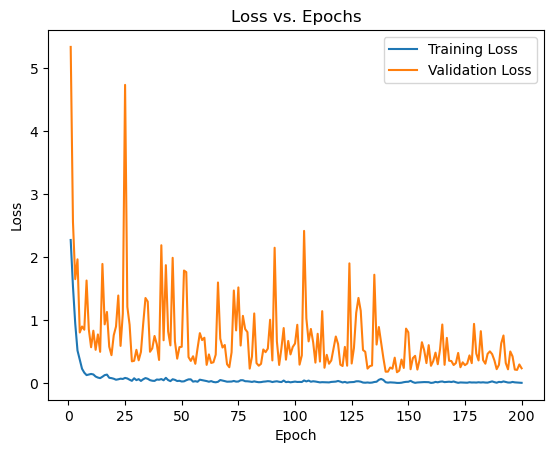

27/27 [==============================] - 3s 34ms/step
Accuracy: 0.9607142857142857
Average Precision: 0.9627376860913761
Average Recall: 0.9607142857142857
Average F1-score: 0.960827599113387


In [5]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate confusion matrix as before
cm = confusion_matrix(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))


print(cm)


27/27 [==============================] - 2s 30ms/step
[[ 69   2   0   0   0   0   1   2]
 [  0 126   0   0   0   0   0   0]
 [  0   0 115   0   0   4   0   4]
 [  0   1   0 103   2   6   0   0]
 [  0   0   0   0 108   0   0   0]
 [  0   1   0   0   0  88   0   0]
 [  0   2   3   0   0   0 104   1]
 [  0   0   1   0   1   2   0  94]]


0.1 test size

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



Epoch 1/300
118/118 [==============================] - 56s 245ms/step - loss: 2.2120 - accuracy: 0.2434 - val_loss: 7.2679 - val_accuracy: 0.1524
Epoch 2/300
118/118 [==============================] - 25s 211ms/step - loss: 1.4238 - accuracy: 0.4846 - val_loss: 1.6250 - val_accuracy: 0.4619
Epoch 3/300
118/118 [==============================] - 26s 219ms/step - loss: 0.8302 - accuracy: 0.7074 - val_loss: 0.8581 - val_accuracy: 0.7262
Epoch 4/300
118/118 [==============================] - 23s 193ms/step - loss: 0.4750 - accuracy: 0.8464 - val_loss: 1.3733 - val_accuracy: 0.6000
Epoch 5/300
118/118 [==============================] - 21s 181ms/step - loss: 0.2464 - accuracy: 0.9296 - val_loss: 3.3771 - val_accuracy: 0.3976
Epoch 6/300
118/118 [==============================] - 22s 183ms/step - loss: 0.1967 - accuracy: 0.9417 - val_loss: 1.1251 - val_accuracy: 0.6619
Epoch 7/300
118/118 [==============================] - 22s 186ms/step - loss: 0.1635 - accuracy: 0.9539 - val_loss: 0.6685 -

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test01combined.h5


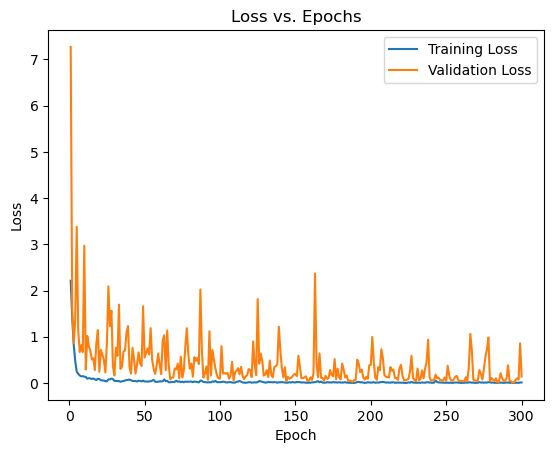

14/14 [==============================] - 23s 13ms/step
Accuracy: 0.9595238095238096
Average Precision: 0.9635821380988142
Average Recall: 0.9595238095238096
Average F1-score: 0.9595082118246199


In [10]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate confusion matrix as before
cm = confusion_matrix(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))


print(cm)


14/14 [==============================] - 0s 11ms/step
[[36  0  0  0  0  0  0  0]
 [ 0 60  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  1  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  1  0  1 54  0  0  0]
 [ 0  0  0  0  0 52  0  0]
 [ 0  0  0  0  2  0 47  0]
 [ 0  0  0  0  0  0  0 50]]


14/14 [==============================] - 3s 44ms/step


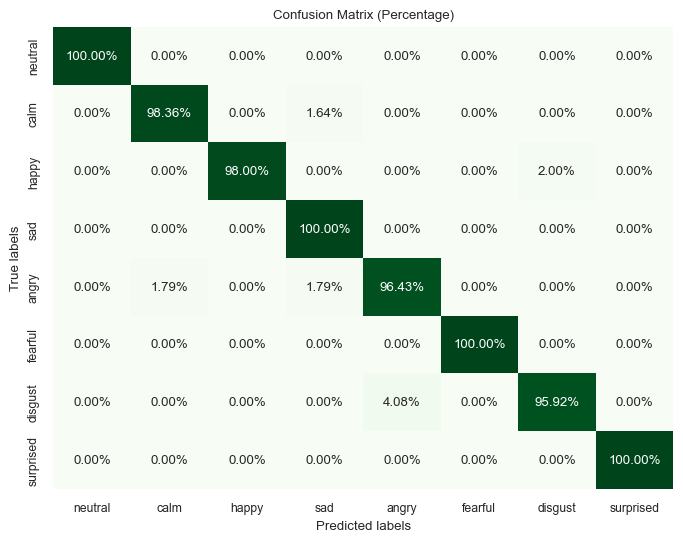

Confusion Matrix Counts:
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.98360656 0.         0.01639344 0.         0.
  0.         0.        ]
 [0.         0.         0.98       0.         0.         0.
  0.02       0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.01785714 0.         0.01785714 0.96428571 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.04081633 0.
  0.95918367 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test01combined.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

chromagrams scam

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_c = label_binarizer.fit_transform(y_train_c)
y_test_c = label_binarizer.transform(y_test_c)



In [6]:


from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
input_shape = (256,256, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu')(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu')(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 254, 254, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 254, 254, 64)         1792      ['input_2[0][0]']             
                                                                                             

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.set(font_scale=0.8)  # for label size
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


27/27 [==============================] - 45s 1s/step


27/27 [==============================] - 34s 1s/step


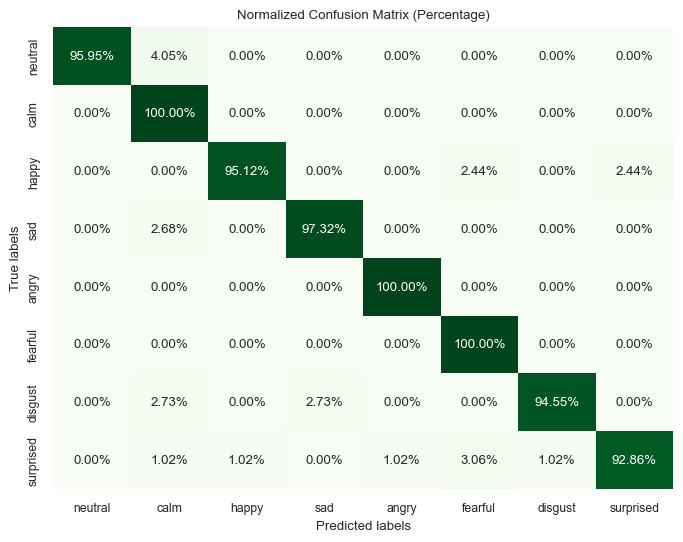

Confusion Matrix Counts:
[[0.95945946 0.04054054 0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.95121951 0.         0.         0.02439024
  0.         0.02439024]
 [0.         0.02678571 0.         0.97321429 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.02727273 0.         0.02727273 0.         0.
  0.94545455 0.        ]
 [0.         0.01020408 0.01020408 0.         0.01020408 0.03061224
  0.01020408 0.92857143]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test_c,X_test_c])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_c, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

In [ ]:
# Train the model
history = model.fit([X_train_c, X_train_c], y_train_c, batch_size=32, epochs=100, validation_data=([X_test_c, X_test_c], y_test_c))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02chromascam.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_c,X_test_c])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_c, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_c, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_c, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_c, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


Epoch 1/100


105/105 [==============================] - 235s 2s/step - loss: 2.5084 - accuracy: 0.2390 - val_loss: 1.9944 - val_accuracy: 0.3119
Epoch 2/100
105/105 [==============================] - 222s 2s/step - loss: 1.5000 - accuracy: 0.4717 - val_loss: 1.3766 - val_accuracy: 0.5262
Epoch 3/100
105/105 [==============================] - 221s 2s/step - loss: 0.7841 - accuracy: 0.7333 - val_loss: 0.8612 - val_accuracy: 0.7238
Epoch 4/100
105/105 [==============================] - 230s 2s/step - loss: 0.4071 - accuracy: 0.8766 - val_loss: 0.9828 - val_accuracy: 0.6738
Epoch 5/100
105/105 [==============================] - 239s 2s/step - loss: 0.2256 - accuracy: 0.9350 - val_loss: 0.7190 - val_accuracy: 0.7548
Epoch 6/100
105/105 [==============================] - 221s 2s/step - loss: 0.1405 - accuracy: 0.9648 - val_loss: 0.1774 - val_accuracy: 0.9571
Epoch 7/100
105/105 [==============================] - 229s 2s/step - loss: 0.0983 - accuracy: 0.9726 - val_loss: 0.2732 - val_accurac

27/27 [==============================] - 7s 248ms/step


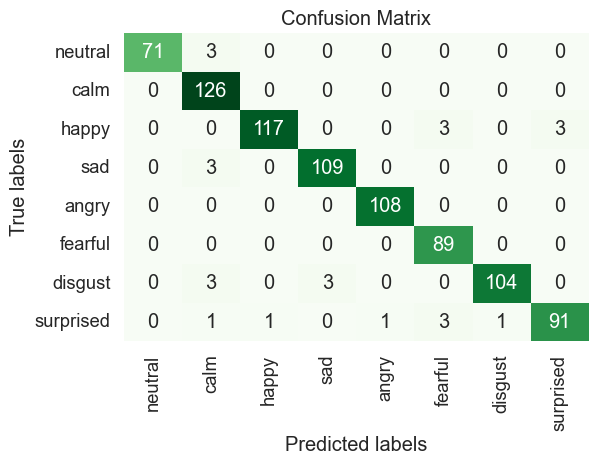

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test_c,X_test_c])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_c, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


27/27 [==============================] - 7s 239ms/step


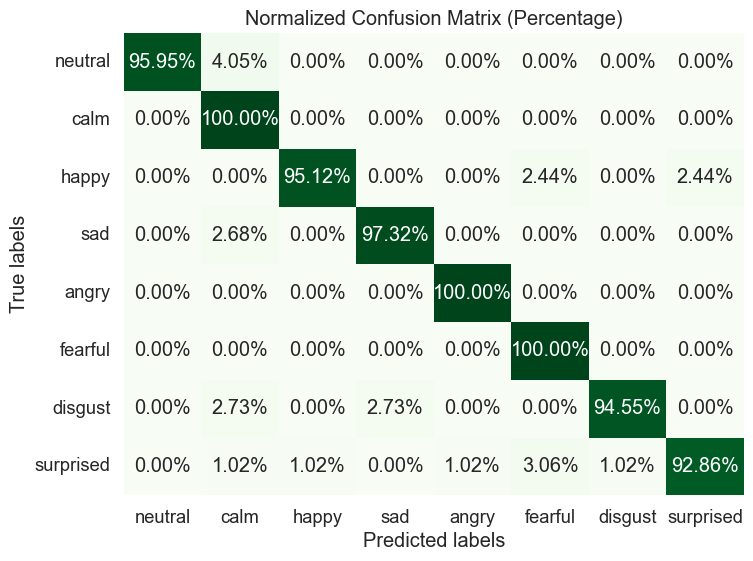

Confusion Matrix Counts:
[[0.95945946 0.04054054 0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.95121951 0.         0.         0.02439024
  0.         0.02439024]
 [0.         0.02678571 0.         0.97321429 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.02727273 0.         0.02727273 0.         0.
  0.94545455 0.        ]
 [0.         0.01020408 0.01020408 0.         0.01020408 0.03061224
  0.01020408 0.92857143]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test_c,X_test_c])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_c, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test_c,X_test_c])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_c, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model


# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load the model
model = tf.keras.models.load_model('path_to_your_saved_model.h5')

# Step 2: Compile the model (if necessary, using the same configuration as during training)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Load training history (if available)
# If you saved the history during training
history = load_training_history('path_to_your_training_history.pkl')

# Step 4: Plot accuracy vs epochs
# If you have training history, plot it
# plt.plot(history['accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train'], loc='upper left')
# plt.show()

# If you don't have training history, you can't directly plot accuracy vs epochs.
# You would have to train the model again, and during training, you can use callbacks to save the history.


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load the model
model = tf.keras.models.load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

# Step 2: Plot accuracy vs epochs
plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()


AttributeError: 'NoneType' object has no attribute 'history'

27/27 [==============================] - 36s 827ms/step


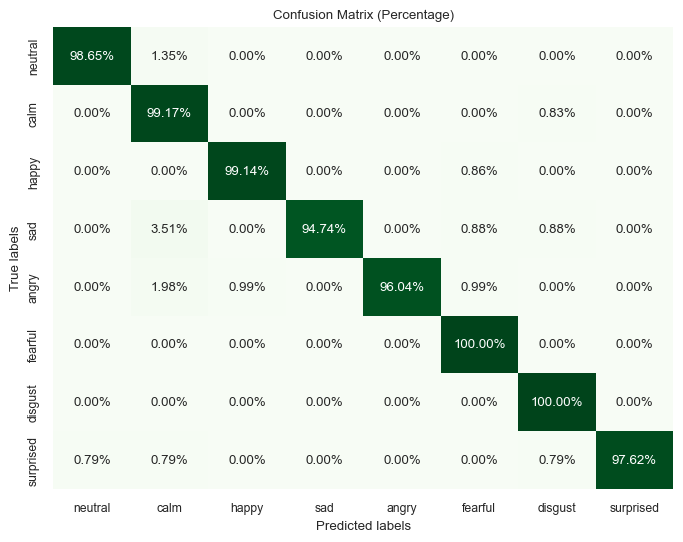

Confusion Matrix Counts:
[[0.98648649 0.01351351 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.99173554 0.         0.         0.         0.
  0.00826446 0.        ]
 [0.         0.         0.99137931 0.         0.         0.00862069
  0.         0.        ]
 [0.         0.03508772 0.         0.94736842 0.         0.00877193
  0.00877193 0.        ]
 [0.         0.01980198 0.00990099 0.         0.96039604 0.00990099
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.00793651 0.00793651 0.         0.         0.         0.
  0.00793651 0.97619048]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.6)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

MemoryError: Unable to allocate 630. MiB for an array with shape (840, 256, 256, 3) and data type float32

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_c = label_binarizer.fit_transform(y_train_c)
y_test_c = label_binarizer.transform(y_test_c)



In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy", labels)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(512, (5, 5), activation='relu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels256.npy", labels)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 128, 128, 32)         896       ['input_7[0][0]']             
                                                                                                  
 conv2d_17 (Conv2D)          (None, 128, 128, 64)         1792      ['input_8[0][0]']             
                                                                                            

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [9]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3356, 10, 5, 512)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200


105/105 [==============================] - 7s 25ms/step - loss: 1.9963 - accuracy: 0.3176 - val_loss: 4.7340 - val_accuracy: 0.1476
Epoch 2/200
105/105 [==============================] - 2s 22ms/step - loss: 1.1839 - accuracy: 0.5873 - val_loss: 2.1389 - val_accuracy: 0.2952
Epoch 3/200
105/105 [==============================] - 2s 19ms/step - loss: 0.5880 - accuracy: 0.8033 - val_loss: 1.8003 - val_accuracy: 0.4750
Epoch 4/200
105/105 [==============================] - 2s 19ms/step - loss: 0.3013 - accuracy: 0.9011 - val_loss: 2.6785 - val_accuracy: 0.4190
Epoch 5/200
105/105 [==============================] - 2s 19ms/step - loss: 0.1888 - accuracy: 0.9362 - val_loss: 1.3166 - val_accuracy: 0.6214
Epoch 6/200
105/105 [==============================] - 2s 18ms/step - loss: 0.1524 - accuracy: 0.9538 - val_loss: 3.6536 - val_accuracy: 0.3226
Epoch 7/200
105/105 [==============================] - 2s 18ms/step - loss: 0.1486 - accuracy: 0.9487 - val_loss: 1.9426 - val_accurac

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02complicatedcombined.h5


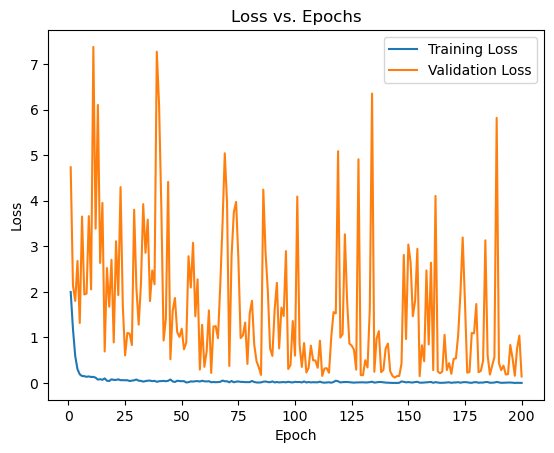

27/27 [==============================] - 0s 5ms/step
Accuracy: 0.9714285714285714
Average Precision: 0.973894584052043
Average Recall: 0.9714285714285714
Average F1-score: 0.9716104063124135


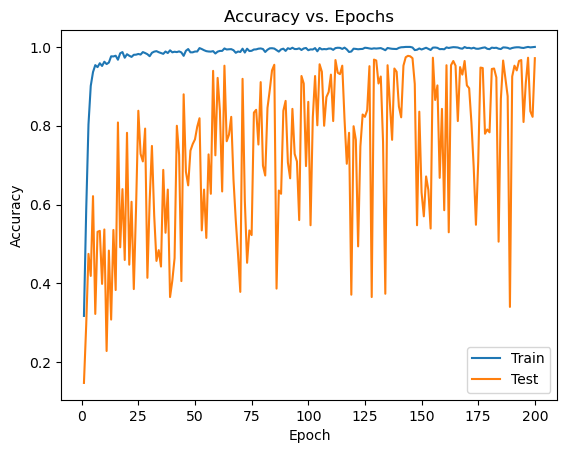

In [11]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02complicatedcombined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [3]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/300


118/118 [==============================] - 6s 20ms/step - loss: 1.9211 - accuracy: 0.3361 - val_loss: 4.8528 - val_accuracy: 0.1500
Epoch 2/300
118/118 [==============================] - 2s 16ms/step - loss: 1.0133 - accuracy: 0.6388 - val_loss: 2.2626 - val_accuracy: 0.2976
Epoch 3/300
118/118 [==============================] - 2s 16ms/step - loss: 0.5088 - accuracy: 0.8308 - val_loss: 1.4983 - val_accuracy: 0.5000
Epoch 4/300
118/118 [==============================] - 2s 15ms/step - loss: 0.2507 - accuracy: 0.9256 - val_loss: 2.1993 - val_accuracy: 0.4571
Epoch 5/300
118/118 [==============================] - 2s 15ms/step - loss: 0.2042 - accuracy: 0.9359 - val_loss: 2.6614 - val_accuracy: 0.4190
Epoch 6/300
118/118 [==============================] - 2s 16ms/step - loss: 0.1321 - accuracy: 0.9584 - val_loss: 0.9188 - val_accuracy: 0.6810
Epoch 7/300
118/118 [==============================] - 2s 16ms/step - loss: 0.1027 - accuracy: 0.9669 - val_loss: 1.5923 - val_accurac

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


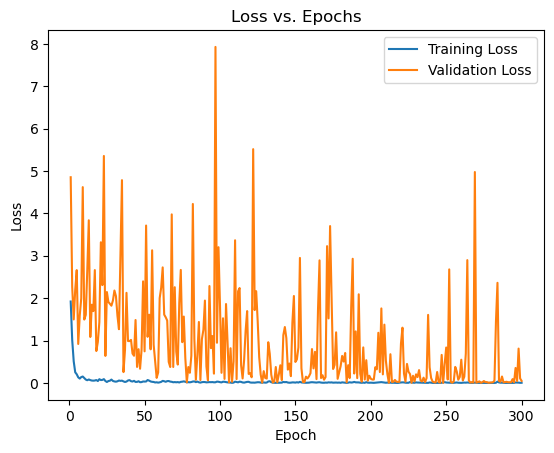

14/14 [==============================] - 0s 4ms/step
Accuracy: 0.9928571428571429
Average Precision: 0.9930559334845048
Average Recall: 0.9928571428571429
Average F1-score: 0.9928422121917193


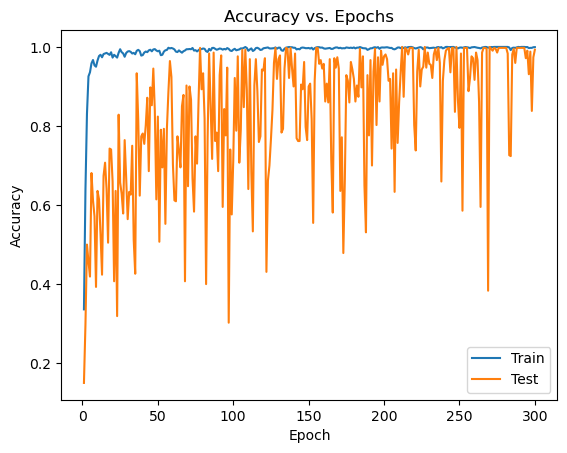

In [5]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01complicatedcombined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



0.2 test size

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/300
105/105 [==============================] - 5s 20ms/step - loss: 1.9081 - accuracy: 0.3385 - val_loss: 5.9017 - val_accuracy: 0.1869
Epoch 2/300
105/105 [==============================] - 2s 16ms/step - loss: 1.1440 - accuracy: 0.6126 - val_loss: 4.4055 - val_accuracy: 0.2214
Epoch 3/300
105/105 [==============================] - 2s 17ms/step - loss: 0.5843 - accuracy: 0.8021 - val_loss: 2.6593 - val_accuracy: 0.3631
Epoch 4/300
105/105 [==============================] - 2s 17ms/step - loss: 0.3238 - accuracy: 0.9008 - val_loss: 2.7861 - val_accuracy: 0.4226
Epoch 5/300
105/105 [==============================] - 2s 17ms/step - loss: 0.2020 - accuracy: 0.9318 - val_loss: 3.2106 - val_accuracy: 0.4500
Epoch 6/300
105/105 [==============================] - 2s 17ms/step - loss: 0.1405 - accuracy: 0.9544 - val_loss: 2.8001 - val_accuracy: 0.4179
Epoch 7/300
105/105 [==============================] - 2s 17ms/step - loss: 0.1610 - accuracy: 0.9505 - val_loss: 6.2656 - val_accuracy:

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


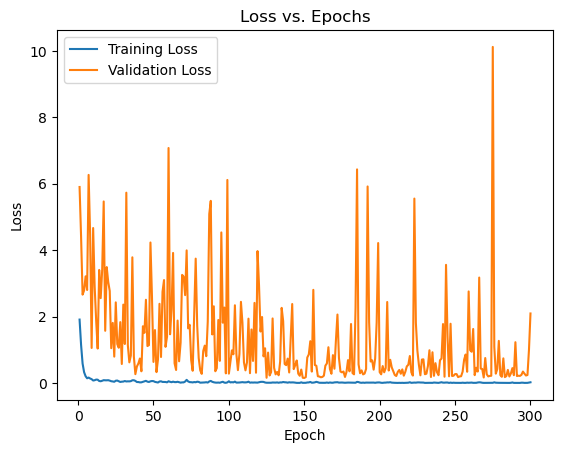

27/27 [==============================] - 0s 8ms/step
Accuracy: 0.6261904761904762
Average Precision: 0.8443855498186628
Average Recall: 0.6261904761904762
Average F1-score: 0.6492447397157117


In [8]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02complicated(new)combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [11]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/300
118/118 [==============================] - 5s 19ms/step - loss: 1.9937 - accuracy: 0.3051 - val_loss: 5.7248 - val_accuracy: 0.1190
Epoch 2/300
118/118 [==============================] - 2s 17ms/step - loss: 1.2737 - accuracy: 0.5466 - val_loss: 3.4231 - val_accuracy: 0.2405
Epoch 3/300
118/118 [==============================] - 2s 18ms/step - loss: 0.7144 - accuracy: 0.7503 - val_loss: 5.6874 - val_accuracy: 0.1976
Epoch 4/300
118/118 [==============================] - 2s 18ms/step - loss: 0.4626 - accuracy: 0.8475 - val_loss: 2.2772 - val_accuracy: 0.4786
Epoch 5/300
118/118 [==============================] - 2s 17ms/step - loss: 0.2433 - accuracy: 0.9182 - val_loss: 1.4954 - val_accuracy: 0.6357
Epoch 6/300
118/118 [==============================] - 2s 18ms/step - loss: 0.1876 - accuracy: 0.9378 - val_loss: 2.9216 - val_accuracy: 0.3952
Epoch 7/300
118/118 [==============================] - 2s 18ms/step - loss: 0.2165 - accuracy: 0.9272 - val_loss: 5.8018 - val_accuracy:

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 5ms/step
Accuracy: 0.9976190476190476
Average Precision: 0.9976574500768048
Average Recall: 0.9976190476190476
Average F1-score: 0.9976167012752378


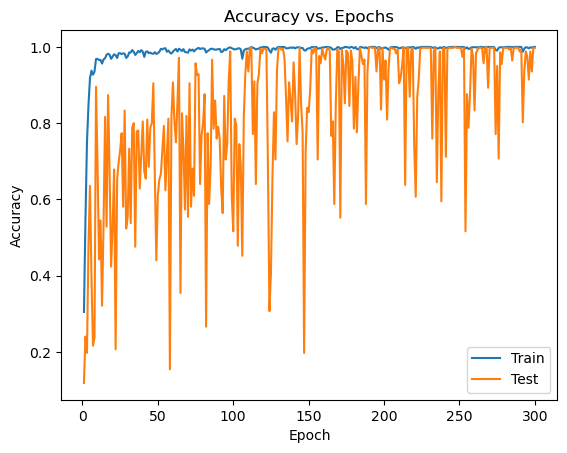

In [13]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test01complicated(new)combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



0.2 test size

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/300


105/105 [==============================] - 4s 18ms/step - loss: 2.0299 - accuracy: 0.2953 - val_loss: 5.6314 - val_accuracy: 0.1690
Epoch 2/300
105/105 [==============================] - 2s 16ms/step - loss: 1.3356 - accuracy: 0.5274 - val_loss: 5.0764 - val_accuracy: 0.1298
Epoch 3/300
105/105 [==============================] - 2s 15ms/step - loss: 0.7843 - accuracy: 0.7306 - val_loss: 3.6104 - val_accuracy: 0.2500
Epoch 4/300
105/105 [==============================] - 2s 15ms/step - loss: 0.5004 - accuracy: 0.8275 - val_loss: 2.2049 - val_accuracy: 0.4214
Epoch 5/300
105/105 [==============================] - 2s 15ms/step - loss: 0.3425 - accuracy: 0.8823 - val_loss: 8.0382 - val_accuracy: 0.1667
Epoch 6/300
105/105 [==============================] - 2s 17ms/step - loss: 0.2393 - accuracy: 0.9195 - val_loss: 4.1598 - val_accuracy: 0.2869
Epoch 7/300
105/105 [==============================] - 2s 19ms/step - loss: 0.1476 - accuracy: 0.9541 - val_loss: 2.0437 - val_accurac

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


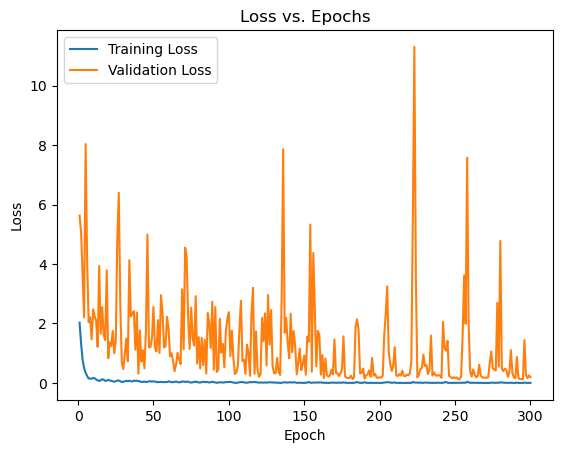

27/27 [==============================] - 0s 4ms/step
Accuracy: 0.9642857142857143
Average Precision: 0.9650154866497448
Average Recall: 0.9642857142857143
Average F1-score: 0.96419350201683


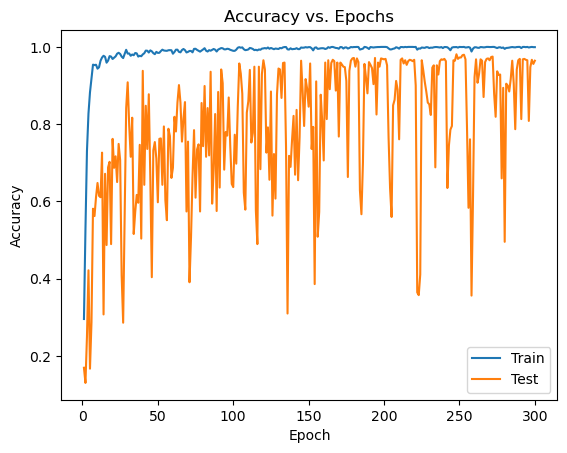

In [3]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02(new)combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



27/27 [==============================] - 0s 5ms/step


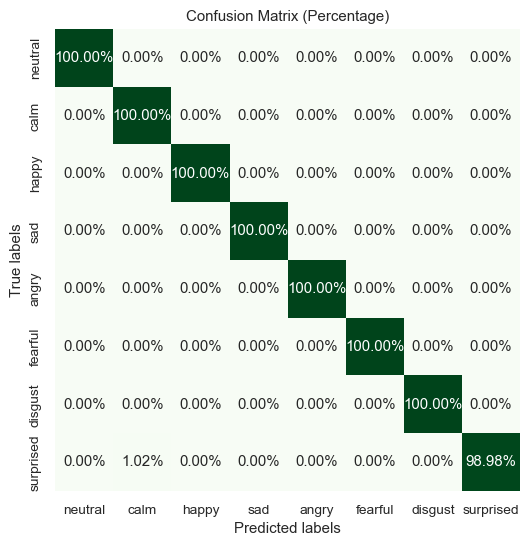

Confusion Matrix Counts:
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.01020408 0.         0.         0.         0.
  0.         0.98979592]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test01complicated(new)combined.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

27/27 [==============================] - 0s 5ms/step


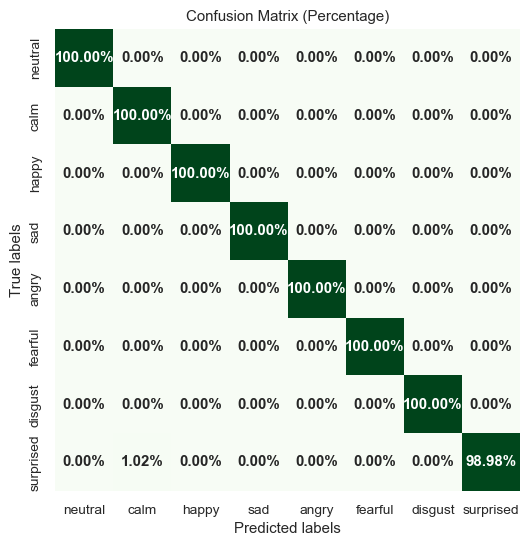

Confusion Matrix Counts:
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.01020408 0.         0.         0.         0.
  0.         0.98979592]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test01complicated(new)combined.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


27/27 [==============================] - 0s 4ms/step


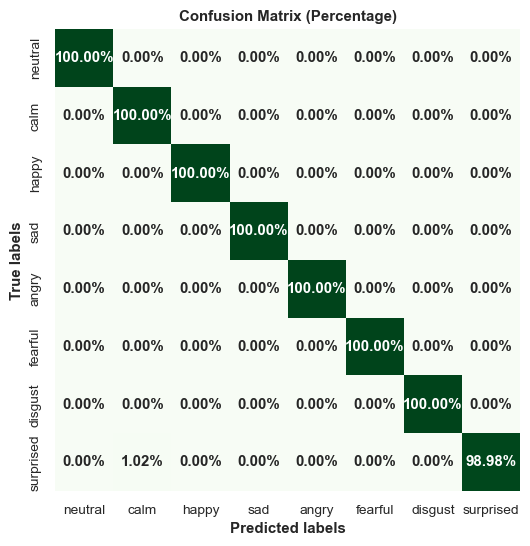

Confusion Matrix Counts:
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.01020408 0.         0.         0.         0.
  0.         0.98979592]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test01complicated(new)combined.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix (Percentage)', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02chromanew.h5"
r"C:\Users\adwit\Downloads\cnn_models\test02spectronew.h5" 

27/27 [==============================] - 8s 270ms/step


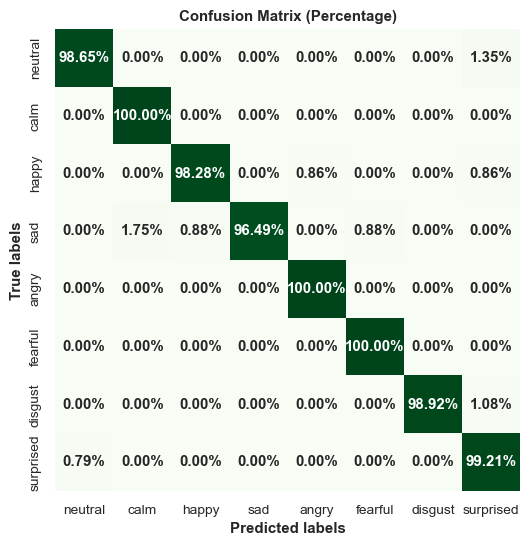

Confusion Matrix Counts:
[[0.98648649 0.         0.         0.         0.         0.
  0.         0.01351351]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.98275862 0.         0.00862069 0.
  0.         0.00862069]
 [0.         0.01754386 0.00877193 0.96491228 0.         0.00877193
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.98924731 0.01075269]
 [0.00793651 0.         0.         0.         0.         0.
  0.         0.99206349]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02spectronew.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix (Percentage)', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



27/27 [==============================] - 9s 280ms/step


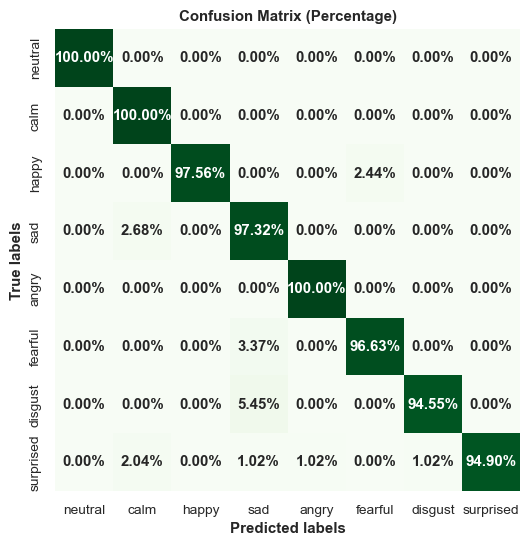

Confusion Matrix Counts:
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.97560976 0.         0.         0.02439024
  0.         0.        ]
 [0.         0.02678571 0.         0.97321429 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.03370787 0.         0.96629213
  0.         0.        ]
 [0.         0.         0.         0.05454545 0.         0.
  0.94545455 0.        ]
 [0.         0.02040816 0.         0.01020408 0.01020408 0.
  0.01020408 0.94897959]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chromanew.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix (Percentage)', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256elu.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256elu.npy", labels)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                             

In [6]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256elu.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels256elu.npy", labels)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 128, 64)         1792      ['input_6[0][0]']             
                                                                                            

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256elu.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256elu.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256elu.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3356, 10, 5, 512)


Epoch 1/300


105/105 [==============================] - 7s 24ms/step - loss: 2.2848 - accuracy: 0.2014 - val_loss: 4.7032 - val_accuracy: 0.1500
Epoch 2/300
105/105 [==============================] - 2s 17ms/step - loss: 1.8382 - accuracy: 0.3141 - val_loss: 2.7726 - val_accuracy: 0.2024
Epoch 3/300
105/105 [==============================] - 2s 17ms/step - loss: 1.5299 - accuracy: 0.4276 - val_loss: 6.3267 - val_accuracy: 0.1655
Epoch 4/300
105/105 [==============================] - 2s 17ms/step - loss: 1.2132 - accuracy: 0.5614 - val_loss: 2.5837 - val_accuracy: 0.3024
Epoch 5/300
105/105 [==============================] - 2s 17ms/step - loss: 0.9448 - accuracy: 0.6666 - val_loss: 3.0965 - val_accuracy: 0.2536
Epoch 6/300
105/105 [==============================] - 2s 17ms/step - loss: 0.6809 - accuracy: 0.7628 - val_loss: 7.4343 - val_accuracy: 0.1917
Epoch 7/300
105/105 [==============================] - 2s 17ms/step - loss: 0.5101 - accuracy: 0.8296 - val_loss: 5.5390 - val_accurac

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02(newelu)combined.h5


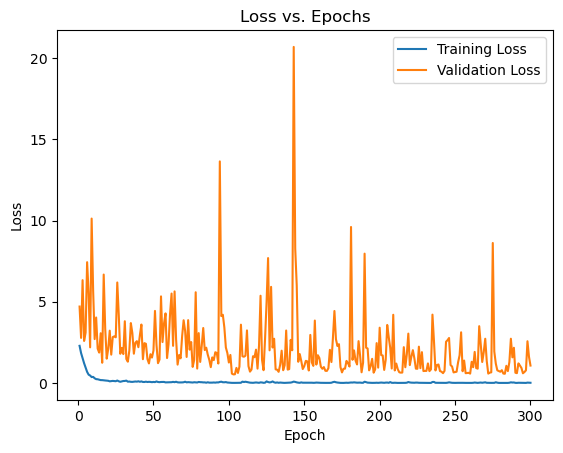

27/27 [==============================] - 0s 5ms/step
Accuracy: 0.7880952380952381
Average Precision: 0.8221162584778033
Average Recall: 0.7880952380952381
Average F1-score: 0.7798793672409182


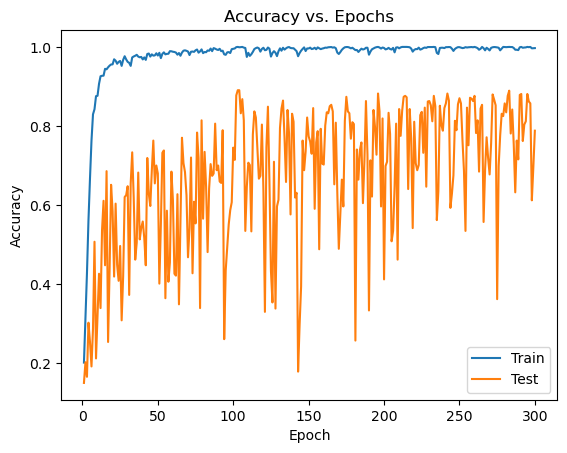

In [10]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=300, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02(newelu)combined.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



k-fold validation

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256, 256, 3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

# Define the number of folds for k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)


In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(256, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Fold 1/5
Epoch 1/30


53/53 [==============================] - 56s 947ms/step - loss: 1.9276 - accuracy: 0.3409 - val_loss: 7.5650 - val_accuracy: 0.1369
Epoch 2/30
53/53 [==============================] - 43s 816ms/step - loss: 1.0648 - accuracy: 0.6243 - val_loss: 6.7971 - val_accuracy: 0.2012
Epoch 3/30
53/53 [==============================] - 65s 1s/step - loss: 0.4443 - accuracy: 0.8513 - val_loss: 2.7912 - val_accuracy: 0.4429
Epoch 4/30
53/53 [==============================] - 75s 1s/step - loss: 0.1886 - accuracy: 0.9431 - val_loss: 1.7095 - val_accuracy: 0.5762
Epoch 5/30
53/53 [==============================] - 67s 1s/step - loss: 0.1248 - accuracy: 0.9625 - val_loss: 0.6936 - val_accuracy: 0.7964
Epoch 6/30
53/53 [==============================] - 66s 1s/step - loss: 0.1085 - accuracy: 0.9678 - val_loss: 0.3294 - val_accuracy: 0.9012
Epoch 7/30
53/53 [==============================] - 69s 1s/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.2695 - val_accuracy: 0.9345
Epo

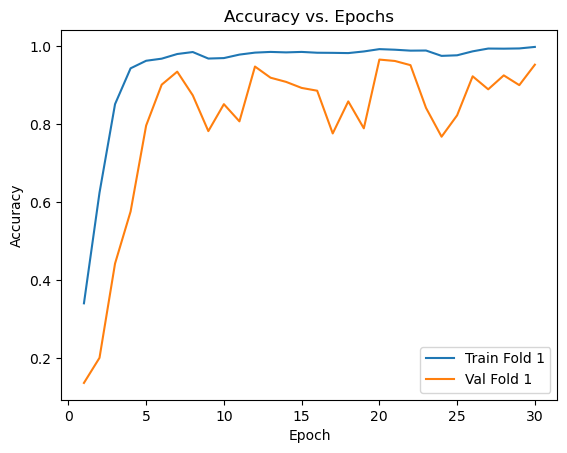

Fold 2/5
Epoch 1/30
53/53 [==============================] - 113s 2s/step - loss: 0.0350 - accuracy: 0.9914 - val_loss: 0.0904 - val_accuracy: 0.9607
Epoch 2/30
53/53 [==============================] - 85s 2s/step - loss: 0.0306 - accuracy: 0.9893 - val_loss: 0.2600 - val_accuracy: 0.9321
Epoch 3/30
53/53 [==============================] - 79s 1s/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.3374 - val_accuracy: 0.8856
Epoch 4/30
53/53 [==============================] - 73s 1s/step - loss: 0.0106 - accuracy: 0.9958 - val_loss: 0.0119 - val_accuracy: 0.9952
Epoch 5/30
53/53 [==============================] - 67s 1s/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0151 - val_accuracy: 0.9952
Epoch 6/30
53/53 [==============================] - 65s 1s/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.2549 - val_accuracy: 0.9178
Epoch 7/30
53/53 [==============================] - 73s 1s/step - loss: 0.0199 - accuracy: 0.9929 - val_loss: 0.0403 - val_accuracy: 0.9893
Epoch 8/30

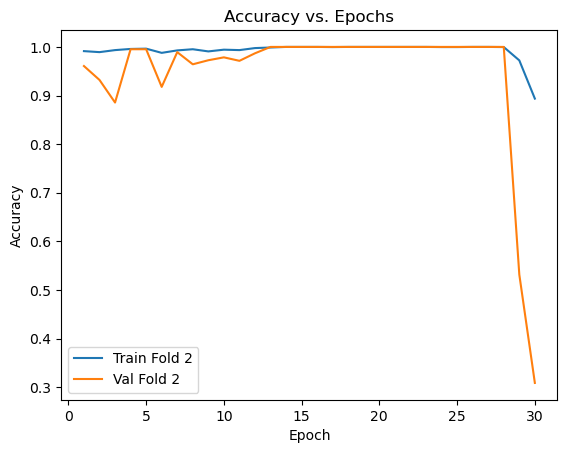

Fold 3/5
Epoch 1/30
53/53 [==============================] - 111s 2s/step - loss: 0.1402 - accuracy: 0.9550 - val_loss: 0.1288 - val_accuracy: 0.9559
Epoch 2/30
53/53 [==============================] - 74s 1s/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/30
53/53 [==============================] - 74s 1s/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/30
53/53 [==============================] - 67s 1s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 5.8486e-04 - val_accuracy: 1.0000
Epoch 5/30
53/53 [==============================] - 73s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.6641e-04 - val_accuracy: 1.0000
Epoch 6/30
53/53 [==============================] - 73s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.2148e-04 - val_accuracy: 1.0000
Epoch 7/30
14/53 [======>.......................] - ETA: 44s - loss: 0.0043 - accuracy: 0.9989

In [ ]:

fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(chromagrams, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = chromagrams[train_indices], chromagrams[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=64, epochs=30, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([X_val,X_val], y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Print average accuracy across all folds
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')

# Save the trained model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAkfold530.h5"
model.save(model_path)
print("Model saved successfully at:", model_path)

In [ ]:

fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(chromagrams, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = chromagrams[train_indices], chromagrams[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=64, epochs=30, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([X_val,X_val], y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')

model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAkfold530.h5"
model.save(model_path)
print("Model saved successfully at:", model_path)

Fold 1/5
Epoch 1/30
 1/53 [..............................] - ETA: 52:29 - loss: 2.8888 - accuracy: 0.1250

In [1]:
 import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3,3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

Epoch 1/100


105/105 [==============================] - 398s 3s/step - loss: 2.6189 - accuracy: 0.1710 - val_loss: 8.8261 - val_accuracy: 0.1214
Epoch 2/100
105/105 [==============================] - 303s 3s/step - loss: 2.2215 - accuracy: 0.2217 - val_loss: 1.9707 - val_accuracy: 0.2464
Epoch 3/100
105/105 [==============================] - 303s 3s/step - loss: 1.8935 - accuracy: 0.3200 - val_loss: 1.7927 - val_accuracy: 0.3298
Epoch 4/100
105/105 [==============================] - 280s 3s/step - loss: 1.6623 - accuracy: 0.3892 - val_loss: 1.8221 - val_accuracy: 0.3250
Epoch 5/100
105/105 [==============================] - 287s 3s/step - loss: 1.5108 - accuracy: 0.4344 - val_loss: 1.3566 - val_accuracy: 0.4976
Epoch 6/100
105/105 [==============================] - 280s 3s/step - loss: 1.3294 - accuracy: 0.5072 - val_loss: 1.4439 - val_accuracy: 0.4929
Epoch 7/100
105/105 [==============================] - 290s 3s/step - loss: 1.1897 - accuracy: 0.5536 - val_loss: 1.1895 - val_accurac

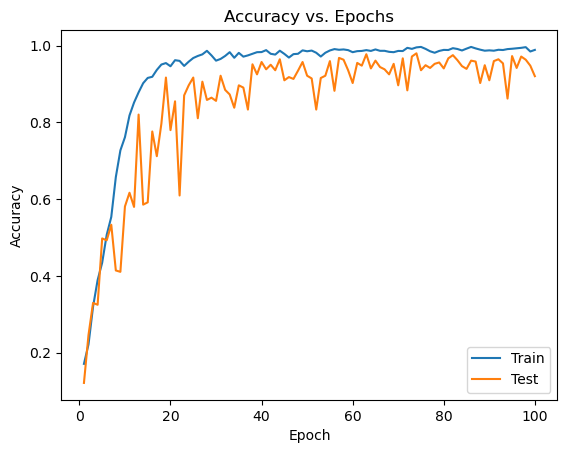

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(512, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Epoch 1/100
105/105 [==============================] - 393s 3s/step - loss: 1.8950 - accuracy: 0.3543 - val_loss: 3.5273 - val_accuracy: 0.2345
Epoch 2/100
105/105 [==============================] - 253s 2s/step - loss: 1.3179 - accuracy: 0.5226 - val_loss: 1.6420 - val_accuracy: 0.4845
Epoch 3/100
105/105 [==============================] - 254s 2s/step - loss: 0.9682 - accuracy: 0.6541 - val_loss: 1.4839 - val_accuracy: 0.5500
Epoch 4/100
105/105 [==============================] - 259s 2s/step - loss: 0.7203 - accuracy: 0.7405 - val_loss: 3.7421 - val_accuracy: 0.3036
Epoch 5/100
105/105 [==============================] - 268s 3s/step - loss: 0.5173 - accuracy: 0.8209 - val_loss: 0.9447 - val_accuracy: 0.6762
Epoch 6/100
105/105 [==============================] - 249s 2s/step - loss: 0.4003 - accuracy: 0.8594 - val_loss: 1.6312 - val_accuracy: 0.6488
Epoch 7/100
105/105 [==============================] - 241s 2s/step - loss: 0.2543 - accuracy: 0.9136 - val_loss: 1.1400 - val_accuracy:

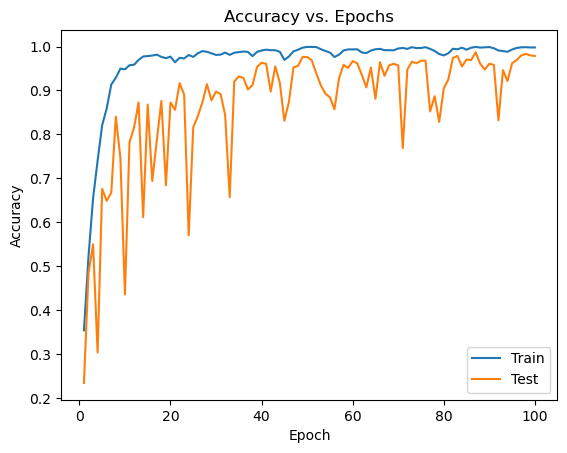

In [6]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 128, 128, 128)        3584      ['input_6[0][0]']             
                                                                                            

In [8]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectroelu.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



Epoch 1/100
105/105 [==============================] - ETA: 0s - loss: 1.7146 - accuracy: 0.4231

MemoryError: Unable to allocate 630. MiB for an array with shape (840, 256, 256, 3) and data type float32

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(512, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

Epoch 1/100


105/105 [==============================] - 100s 900ms/step - loss: 1.9007 - accuracy: 0.3382 - val_loss: 3.8778 - val_accuracy: 0.1690
Epoch 2/100
105/105 [==============================] - 86s 822ms/step - loss: 1.3403 - accuracy: 0.5057 - val_loss: 1.8327 - val_accuracy: 0.4286
Epoch 3/100
105/105 [==============================] - 78s 741ms/step - loss: 1.0290 - accuracy: 0.6204 - val_loss: 1.6088 - val_accuracy: 0.4595
Epoch 4/100
105/105 [==============================] - 78s 747ms/step - loss: 0.7514 - accuracy: 0.7256 - val_loss: 1.4664 - val_accuracy: 0.4893
Epoch 5/100
105/105 [==============================] - 73s 695ms/step - loss: 0.5780 - accuracy: 0.7989 - val_loss: 1.1066 - val_accuracy: 0.6548
Epoch 6/100
105/105 [==============================] - 77s 731ms/step - loss: 0.3729 - accuracy: 0.8731 - val_loss: 1.1853 - val_accuracy: 0.6464
Epoch 7/100
105/105 [==============================] - 76s 729ms/step - loss: 0.2758 - accuracy: 0.9026 - val_loss: 1.509

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectroelu512.h5


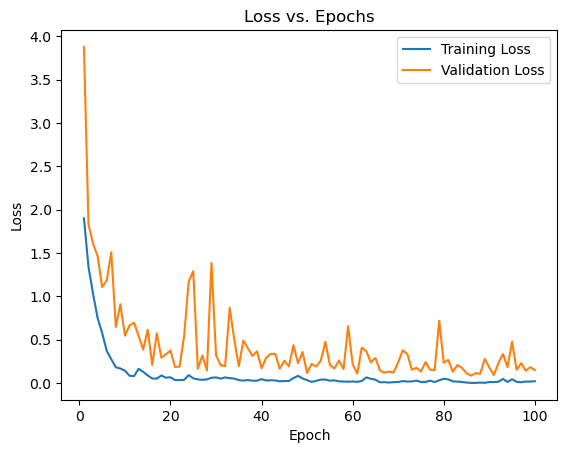

27/27 [==============================] - 33s 605ms/step
Accuracy: 0.9642857142857143
Average Precision: 0.9657754916579415
Average Recall: 0.9642857142857143
Average F1-score: 0.9642997696589898


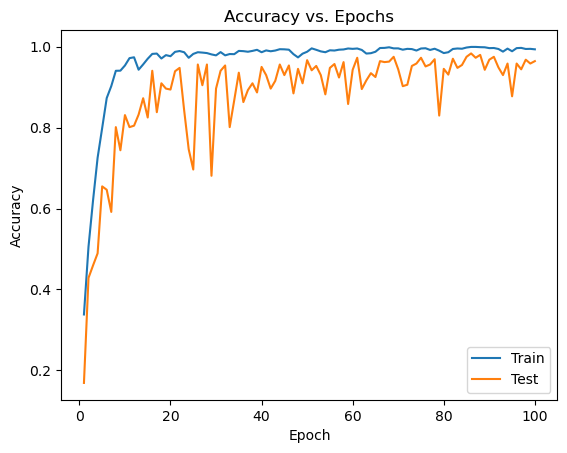

In [3]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectroelu512.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(512, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(256, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(512, (5, 5), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x6)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256elu.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256elu.npy", labels)





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(256, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(512, (5, 5), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x6)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256elu.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels256elu.npy", labels)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256elu.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256elu.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256elu.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(4,2,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='elu'),
    BatchNormalization(),  
    Dense(128, activation='elu'),
    BatchNormalization(),
    Dense(256, activation='elu'),
    BatchNormalization(),
    Dense(256, activation='elu'),
    BatchNormalization(),
    Dense(128, activation='elu'),
    BatchNormalization(),
    Dense(128, activation='elu'),
    BatchNormalization(),
    Dense(256, activation='elu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3356, 4, 2, 512)


Epoch 1/100


105/105 [==============================] - 26s 39ms/step - loss: 1.9752 - accuracy: 0.2893 - val_loss: 3.8230 - val_accuracy: 0.1667
Epoch 2/100
105/105 [==============================] - 3s 26ms/step - loss: 1.3395 - accuracy: 0.5179 - val_loss: 2.5137 - val_accuracy: 0.3155
Epoch 3/100
105/105 [==============================] - 2s 23ms/step - loss: 0.9784 - accuracy: 0.6576 - val_loss: 1.9864 - val_accuracy: 0.3548
Epoch 4/100
105/105 [==============================] - 2s 22ms/step - loss: 0.6543 - accuracy: 0.7819 - val_loss: 3.5393 - val_accuracy: 0.3262
Epoch 5/100
105/105 [==============================] - 3s 25ms/step - loss: 0.5489 - accuracy: 0.8105 - val_loss: 2.5801 - val_accuracy: 0.4238
Epoch 6/100
105/105 [==============================] - 2s 21ms/step - loss: 0.4193 - accuracy: 0.8528 - val_loss: 5.7939 - val_accuracy: 0.2060
Epoch 7/100
105/105 [==============================] - 3s 24ms/step - loss: 0.3221 - accuracy: 0.8847 - val_loss: 4.7388 - val_accura

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02complicated(new)combinedelu.h5


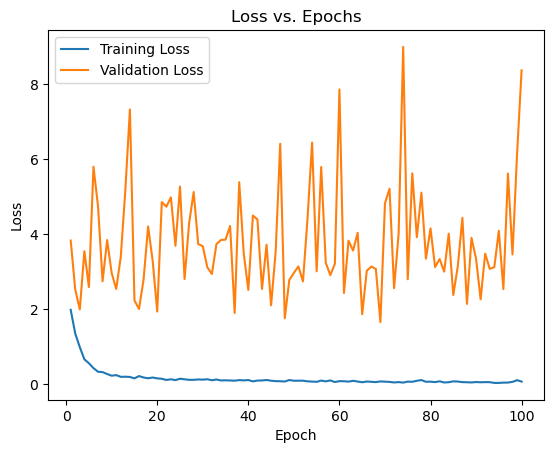

27/27 [==============================] - 2s 10ms/step
Accuracy: 0.23809523809523808

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Average Precision: 0.6283866918706901
Average Recall: 0.23809523809523808
Average F1-score: 0.20720345209483096


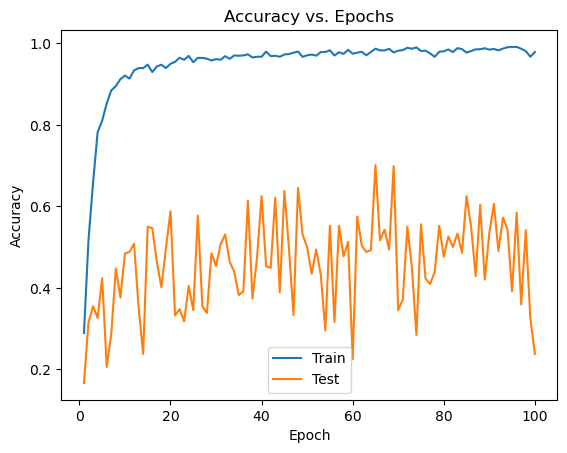

In [8]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=100, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02complicated(new)combinedelu.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [9]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/100
118/118 [==============================] - 21s 50ms/step - loss: 2.2657 - accuracy: 0.2381 - val_loss: 5.5755 - val_accuracy: 0.1167
Epoch 2/100
118/118 [==============================] - 5s 40ms/step - loss: 1.5717 - accuracy: 0.4335 - val_loss: 4.3534 - val_accuracy: 0.1857
Epoch 3/100
118/118 [==============================] - 4s 37ms/step - loss: 1.0177 - accuracy: 0.6396 - val_loss: 2.4010 - val_accuracy: 0.3310
Epoch 4/100
118/118 [==============================] - 4s 35ms/step - loss: 0.5906 - accuracy: 0.7942 - val_loss: 4.5628 - val_accuracy: 0.2905
Epoch 5/100
118/118 [==============================] - 5s 40ms/step - loss: 0.4053 - accuracy: 0.8665 - val_loss: 2.0916 - val_accuracy: 0.4738
Epoch 6/100
118/118 [==============================] - 4s 37ms/step - loss: 0.2327 - accuracy: 0.9285 - val_loss: 4.1431 - val_accuracy: 0.3119
Epoch 7/100
118/118 [==============================] - 4s 35ms/step - loss: 0.2143 - accuracy: 0.9293 - val_loss: 2.3081 - val_accuracy

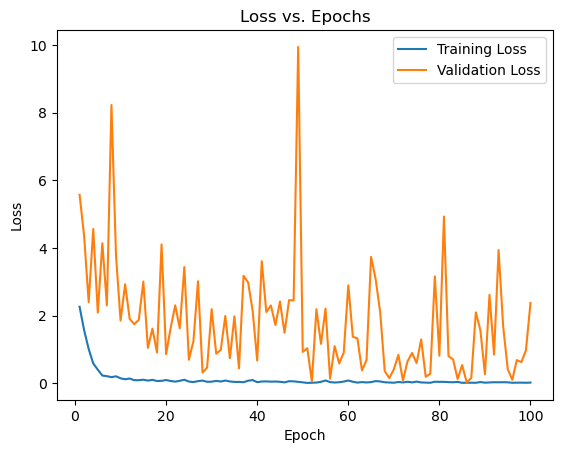

14/14 [==============================] - 1s 11ms/step
Accuracy: 0.5928571428571429
Average Precision: 0.9038419913419914
Average Recall: 0.5928571428571429
Average F1-score: 0.6431009457185409


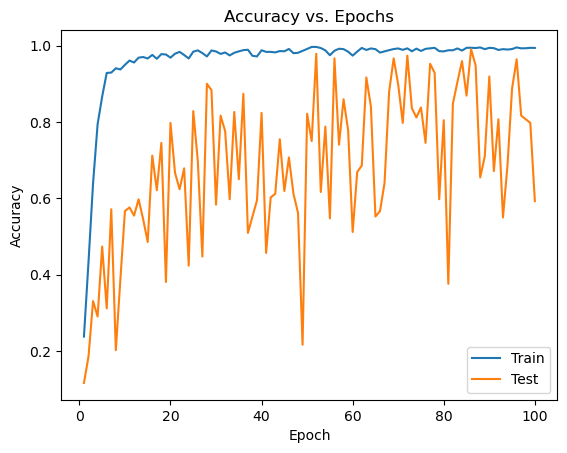

In [13]:
# Train the model
history = model.fit(X_train_co, y_train_co, epochs=100, batch_size=32, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelBinarizer

# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

# Stacking features
stacked_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stacked_features, labels, test_size=0.2, random_state=42)

# Flatten the input features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Fit base classifiers
svm_classifier.fit(X_train_flattened, y_train)
logistic_classifier.fit(X_train_flattened, y_train)
rf_classifier.fit(X_train_flattened, y_train)


# Predictions from base classifiers
svm_predictions_train = svm_classifier.predict_proba(X_train)
logistic_predictions_train = logistic_classifier.predict_proba(X_train)
rf_predictions_train = rf_classifier.predict_proba(X_train)

# Stack predictions
stacked_predictions_train = np.column_stack((svm_predictions_train, logistic_predictions_train, rf_predictions_train))

# Create a label binarizer for target labels
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)



ValueError: Found array with dim 4. SVC expected <= 2.

In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,6)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(stacked_predictions_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
svm_predictions_test = svm_classifier.predict_proba(X_test)
logistic_predictions_test = logistic_classifier.predict_proba(X_test)
rf_predictions_test = rf_classifier.predict_proba(X_test)

stacked_predictions_test = np.column_stack((svm_predictions_test, logistic_predictions_test, rf_predictions_test))

predictions = model.predict(stacked_predictions_test)
accuracy = accuracy_score(np.argmax(predictions, axis=1), np.argmax(label_binarizer.transform(y_test), axis=1))
print("Test Accuracy:", accuracy)


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelBinarizer

# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

# Stacking features
stacked_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stacked_features, labels, test_size=0.2, random_state=42)

# Flatten the input features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize base classifiers
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit base classifiers
svm_classifier.fit(X_train_flattened, y_train)
logistic_classifier.fit(X_train_flattened, y_train)
rf_classifier.fit(X_train_flattened, y_train)

# Predictions from base classifiers
svm_predictions_train = svm_classifier.predict_proba(X_train_flattened)
logistic_predictions_train = logistic_classifier.predict_proba(X_train_flattened)
rf_predictions_train = rf_classifier.predict_proba(X_train_flattened)

# Stack predictions
stacked_predictions_train = np.column_stack((svm_predictions_train, logistic_predictions_train, rf_predictions_train))

# Create a label binarizer for target labels
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)



C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Build CNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(stacked_predictions_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(stacked_predictions_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Predictions on test data
svm_predictions_test = svm_classifier.predict_proba(X_test_flattened)
logistic_predictions_test = logistic_classifier.predict_proba(X_test_flattened)
rf_predictions_test = rf_classifier.predict_proba(X_test_flattened)

# Stack predictions for test data
stacked_predictions_test = np.column_stack((svm_predictions_test, logistic_predictions_test, rf_predictions_test))

# Evaluate the model on test data
predictions = model.predict(stacked_predictions_test)
accuracy = accuracy_score(np.argmax(predictions, axis=1), np.argmax(label_binarizer.transform(y_test), axis=1))
print("Test Accuracy:", accuracy)

Epoch 1/100
84/84 [==============================] - 2s 5ms/step - loss: 1.6586 - accuracy: 0.4307 - val_loss: 0.6539 - val_accuracy: 0.9345
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.7876 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.9013 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9382 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9467 - val_loss: 6.2106e-04 - val_accuracy: 1.0000
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9475 - val_loss: 2.6891e-04 - val_accuracy: 1.0000
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9646 - val_loss: 1.2427e-04 - val_accuracy: 1.0000
E

In [ ]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'

# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



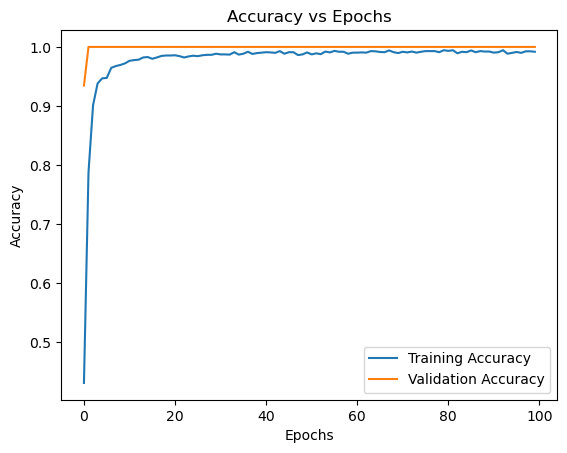

In [19]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)



flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256eludead.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256eludead.npy", labels)





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(512, (5, 5), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256eludead.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels256eludead.npy", labels)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256eludead.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256eludead.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256eludead.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 10, 5, 512)


Epoch 1/100


118/118 [==============================] - 4s 17ms/step - loss: 2.2652 - accuracy: 0.2140 - val_loss: 2.7674 - val_accuracy: 0.1667
Epoch 2/100
118/118 [==============================] - 2s 14ms/step - loss: 1.7456 - accuracy: 0.3469 - val_loss: 2.7743 - val_accuracy: 0.1738
Epoch 3/100
118/118 [==============================] - 2s 15ms/step - loss: 1.3600 - accuracy: 0.5103 - val_loss: 2.1312 - val_accuracy: 0.4167
Epoch 4/100
118/118 [==============================] - 2s 14ms/step - loss: 1.0702 - accuracy: 0.6200 - val_loss: 3.4143 - val_accuracy: 0.2952
Epoch 5/100
118/118 [==============================] - 2s 14ms/step - loss: 0.6967 - accuracy: 0.7524 - val_loss: 2.4392 - val_accuracy: 0.4619
Epoch 6/100
118/118 [==============================] - 2s 14ms/step - loss: 0.5467 - accuracy: 0.8114 - val_loss: 5.2616 - val_accuracy: 0.2310
Epoch 7/100
118/118 [==============================] - 2s 14ms/step - loss: 0.4263 - accuracy: 0.8549 - val_loss: 1.9809 - val_accurac

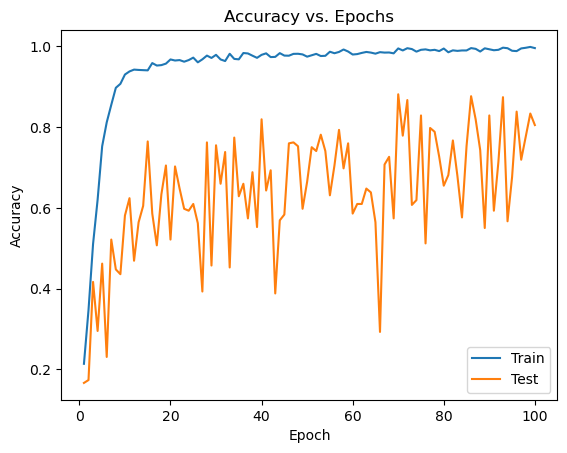

In [9]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=100, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
118/118 [==============================] - 2s 15ms/step - loss: 0.0403 - accuracy: 0.9894 - val_loss: 1.5536 - val_accuracy: 0.7143
Epoch 2/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 6.2000 - val_accuracy: 0.3619
Epoch 3/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.9458 - val_accuracy: 0.8071
Epoch 4/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 1.1685 - val_accuracy: 0.7381
Epoch 5/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0089 - accuracy: 0.9963 - val_loss: 0.9213 - val_accuracy: 0.8357
Epoch 6/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 1.5994 - val_accuracy: 0.7333
Epoch 7/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 1.2958 - val_accuracy:

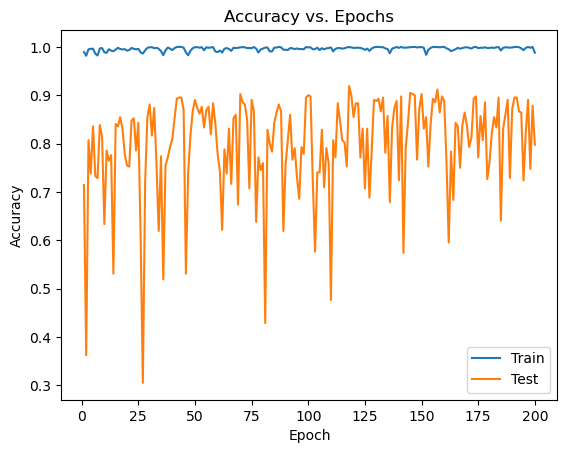

In [10]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256eludead.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256eludead.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256eludead.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.2, random_state=42)



In [13]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
105/105 [==============================] - 4s 17ms/step - loss: 2.2872 - accuracy: 0.2122 - val_loss: 3.9883 - val_accuracy: 0.1452
Epoch 2/200
105/105 [==============================] - 2s 15ms/step - loss: 1.7936 - accuracy: 0.3391 - val_loss: 2.2985 - val_accuracy: 0.2286
Epoch 3/200
105/105 [==============================] - 2s 15ms/step - loss: 1.4683 - accuracy: 0.4651 - val_loss: 1.9111 - val_accuracy: 0.3238
Epoch 4/200
105/105 [==============================] - 2s 15ms/step - loss: 1.1161 - accuracy: 0.6061 - val_loss: 2.9553 - val_accuracy: 0.3083
Epoch 5/200
105/105 [==============================] - 2s 17ms/step - loss: 0.8642 - accuracy: 0.7008 - val_loss: 1.8567 - val_accuracy: 0.5262
Epoch 6/200
105/105 [==============================] - 2s 17ms/step - loss: 0.6396 - accuracy: 0.7801 - val_loss: 4.1548 - val_accuracy: 0.2833
Epoch 7/200
105/105 [==============================] - 2s 16ms/step - loss: 0.4794 - accuracy: 0.8370 - val_loss: 2.5894 - val_accuracy:

ValueError: Found input variables with inconsistent numbers of samples: [420, 840]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras import regularizers

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),  
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
105/105 [==============================] - 4s 21ms/step - loss: 22.9471 - accuracy: 0.2351 - val_loss: 23.4866 - val_accuracy: 0.1202
Epoch 2/200
105/105 [==============================] - 2s 18ms/step - loss: 16.7490 - accuracy: 0.3814 - val_loss: 14.3214 - val_accuracy: 0.2571
Epoch 3/200
105/105 [==============================] - 2s 18ms/step - loss: 11.7594 - accuracy: 0.5054 - val_loss: 12.9342 - val_accuracy: 0.1750
Epoch 4/200
105/105 [==============================] - 2s 19ms/step - loss: 8.3203 - accuracy: 0.5986 - val_loss: 8.6541 - val_accuracy: 0.2726
Epoch 5/200
105/105 [==============================] - 2s 19ms/step - loss: 6.0494 - accuracy: 0.6538 - val_loss: 6.5921 - val_accuracy: 0.3488
Epoch 6/200
105/105 [==============================] - 2s 18ms/step - loss: 4.5133 - accuracy: 0.6993 - val_loss: 5.5187 - val_accuracy: 0.3298
Epoch 7/200
105/105 [==============================] - 2s 18ms/step - loss: 3.6346 - accuracy: 0.7023 - val_loss: 4.1840 - val_acc

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


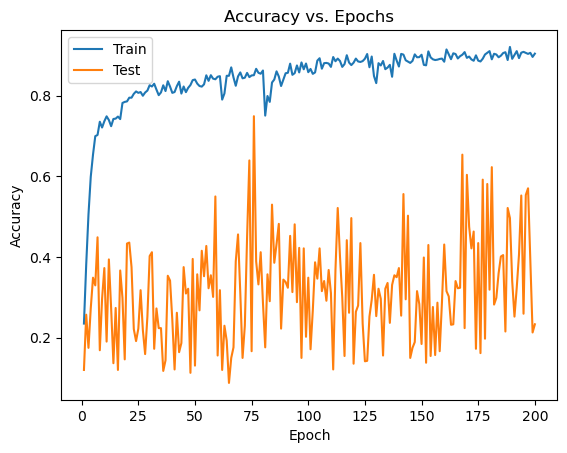

In [15]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
118/118 [==============================] - 49s 222ms/step - loss: 2.4450 - accuracy: 0.1777 - val_loss: 3.1742 - val_accuracy: 0.1429
Epoch 2/200
118/118 [==============================] - 21s 177ms/step - loss: 1.9873 - accuracy: 0.2834 - val_loss: 2.0390 - val_accuracy: 0.2929
Epoch 3/200
118/118 [==============================] - 21s 181ms/step - loss: 1.5157 - accuracy: 0.4444 - val_loss: 1.4130 - val_accuracy: 0.4833
Epoch 4/200
118/118 [==============================] - 21s 182ms/step - loss: 1.0473 - accuracy: 0.6216 - val_loss: 1.3486 - val_accuracy: 0.5405
Epoch 5/200
118/118 [==============================] - 21s 178ms/step - loss: 0.7359 - accuracy: 0.7323 - val_loss: 1.0632 - val_accuracy: 0.6548
Epoch 6/200
118/118 [==============================] - 23s 191ms/step - loss: 0.5159 - accuracy: 0.8281 - val_loss: 2.0807 - val_accuracy: 0.5214
Epoch 7/200
118/118 [==============================] - 22s 183ms/step - loss: 0.3908 - accuracy: 0.8705 - val_loss: 1.2986 -

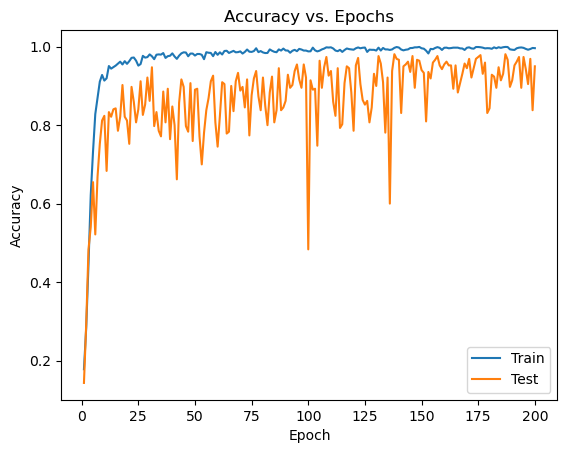

In [21]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [19]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 36, 18, 256)


Epoch 1/300
118/118 [==============================] - 33s 218ms/step - loss: 2.4275 - accuracy: 0.1894 - val_loss: 3.2932 - val_accuracy: 0.1452
Epoch 2/300
118/118 [==============================] - 9s 74ms/step - loss: 1.9338 - accuracy: 0.3136 - val_loss: 2.0726 - val_accuracy: 0.2881
Epoch 3/300
118/118 [==============================] - 8s 69ms/step - loss: 1.4692 - accuracy: 0.4751 - val_loss: 1.3379 - val_accuracy: 0.5333
Epoch 4/300
118/118 [==============================] - 8s 70ms/step - loss: 1.0242 - accuracy: 0.6398 - val_loss: 1.4809 - val_accuracy: 0.5500
Epoch 5/300
118/118 [==============================] - 9s 73ms/step - loss: 0.7236 - accuracy: 0.7566 - val_loss: 1.1836 - val_accuracy: 0.6643
Epoch 6/300
118/118 [==============================] - 9s 76ms/step - loss: 0.5057 - accuracy: 0.8284 - val_loss: 1.0996 - val_accuracy: 0.7071
Epoch 7/300
118/118 [==============================] - 10s 83ms/step - loss: 0.3469 - accuracy: 0.8829 - val_loss: 2.0418 - val_accura

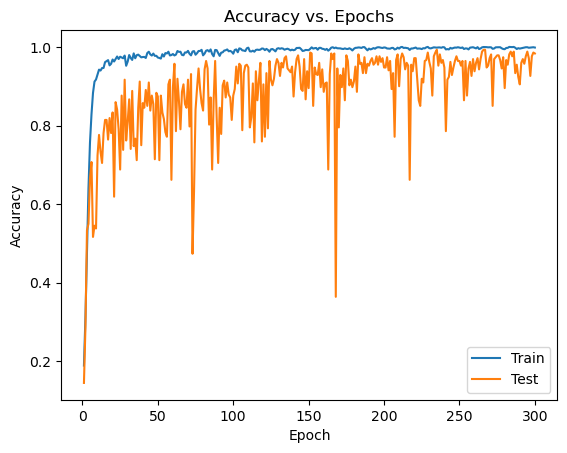

In [23]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=300, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(512, (5, 5), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x5)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256eludead.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels256eludead.npy", labels)


In [52]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [44]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(256, (3,3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)



flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas224eludead4.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels224eludead4.npy", labels)


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 112, 112, 32)         896       ['input_15[0][0]']            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 112, 112, 64)         1792      ['input_16[0][0]']            
                                                                                           

In [45]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [46]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

# Additional Convolutional Block
x6 = Conv2D(256, (3,3), activation='relu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x4)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagramsreal_feas224eludead4.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagramsreal_labels224eludead4.npy", labels)


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 112, 112, 32)         896       ['input_17[0][0]']            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 112, 112, 64)         1792      ['input_18[0][0]']            
                                                                                           

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas224eludead4.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagramsreal_feas224eludead4.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagramsreal_labels224eludead4.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [48]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 18, 9, 256)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(18,9,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
118/118 [==============================] - 7s 9ms/step - loss: 2.3526 - accuracy: 0.1999 - val_loss: 3.3263 - val_accuracy: 0.0738
Epoch 2/200
118/118 [==============================] - 1s 7ms/step - loss: 1.8508 - accuracy: 0.3255 - val_loss: 2.4530 - val_accuracy: 0.2571
Epoch 3/200
118/118 [==============================] - 1s 7ms/step - loss: 1.4746 - accuracy: 0.4632 - val_loss: 5.7094 - val_accuracy: 0.2143
Epoch 4/200
118/118 [==============================] - 1s 7ms/step - loss: 1.0740 - accuracy: 0.6070 - val_loss: 5.0562 - val_accuracy: 0.1976
Epoch 5/200
118/118 [==============================] - 1s 7ms/step - loss: 0.7636 - accuracy: 0.7357 - val_loss: 2.8234 - val_accuracy: 0.3738
Epoch 6/200
118/118 [==============================] - 1s 7ms/step - loss: 0.5287 - accuracy: 0.8199 - val_loss: 4.1119 - val_accuracy: 0.3524
Epoch 7/200
118/118 [==============================] - 1s 7ms/step - loss: 0.3884 - accuracy: 0.8684 - val_loss: 2.8158 - val_accuracy: 0.4357

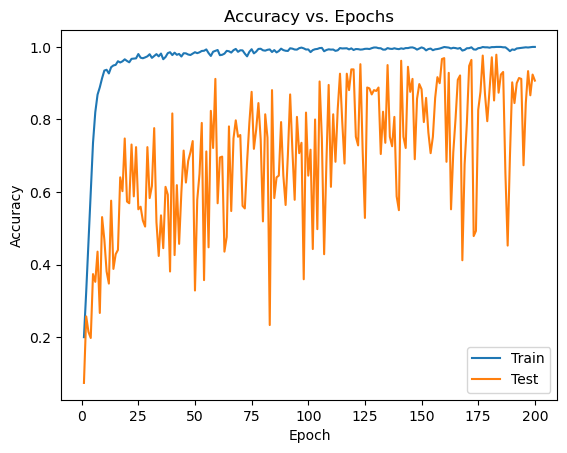

In [32]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
118/118 [==============================] - 6s 16ms/step - loss: 2.5489 - accuracy: 0.1520 - val_loss: 4.0853 - val_accuracy: 0.1190
Epoch 2/200
118/118 [==============================] - 2s 13ms/step - loss: 2.1806 - accuracy: 0.2090 - val_loss: 2.2335 - val_accuracy: 0.2024
Epoch 3/200
118/118 [==============================] - 2s 13ms/step - loss: 1.9444 - accuracy: 0.2744 - val_loss: 1.7715 - val_accuracy: 0.3429
Epoch 4/200
118/118 [==============================] - 1s 10ms/step - loss: 1.7061 - accuracy: 0.3631 - val_loss: 1.6455 - val_accuracy: 0.3952
Epoch 5/200
118/118 [==============================] - 1s 12ms/step - loss: 1.4602 - accuracy: 0.4611 - val_loss: 2.4255 - val_accuracy: 0.3405
Epoch 6/200
118/118 [==============================] - 1s 11ms/step - loss: 1.2089 - accuracy: 0.5532 - val_loss: 3.7489 - val_accuracy: 0.2571
Epoch 7/200
118/118 [==============================] - 1s 11ms/step - loss: 1.0032 - accuracy: 0.6343 - val_loss: 3.9954 - val_accuracy:

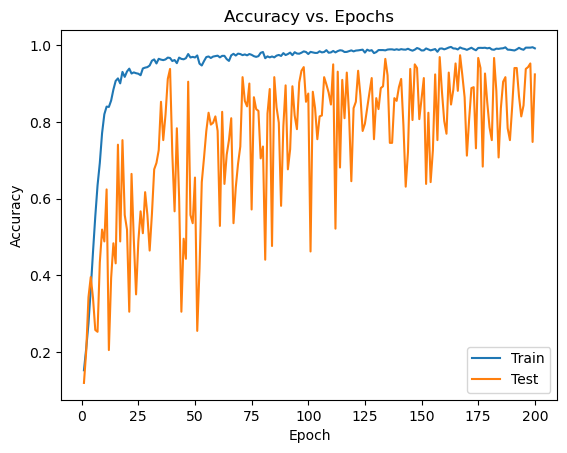

In [42]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(8,4,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
118/118 [==============================] - 7s 27ms/step - loss: 2.4348 - accuracy: 0.1811 - val_loss: 3.6012 - val_accuracy: 0.1429
Epoch 2/200
118/118 [==============================] - 3s 23ms/step - loss: 2.1256 - accuracy: 0.2381 - val_loss: 2.8576 - val_accuracy: 0.1524
Epoch 3/200
118/118 [==============================] - 3s 23ms/step - loss: 1.8413 - accuracy: 0.3165 - val_loss: 1.6679 - val_accuracy: 0.3595
Epoch 4/200
118/118 [==============================] - 3s 23ms/step - loss: 1.5926 - accuracy: 0.4012 - val_loss: 1.6663 - val_accuracy: 0.4333
Epoch 5/200
118/118 [==============================] - 3s 23ms/step - loss: 1.3527 - accuracy: 0.4931 - val_loss: 1.9090 - val_accuracy: 0.3881
Epoch 6/200
118/118 [==============================] - 3s 22ms/step - loss: 1.1272 - accuracy: 0.5861 - val_loss: 2.0282 - val_accuracy: 0.3738
Epoch 7/200
118/118 [==============================] - 3s 22ms/step - loss: 0.9320 - accuracy: 0.6631 - val_loss: 3.5924 - val_accuracy:

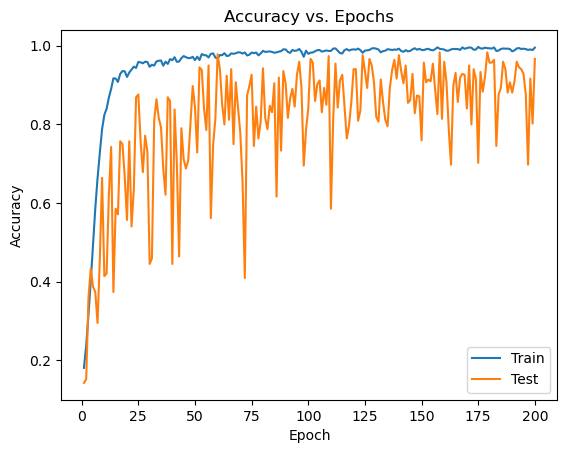

In [51]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [53]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)



flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas224eludead3.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels224eludead3.npy", labels)


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_50 (Conv2D)          (None, 112, 112, 128)        3584      ['input_19[0][0]']            
                                                                                                  
 conv2d_51 (Conv2D)          (None, 112, 112, 256)        7168      ['input_20[0][0]']            
                                                                                           

In [54]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [55]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (224, 224, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)



flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams,chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas224eludead3.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels224eludead3.npy", labels)


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_22 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_53 (Conv2D)          (None, 112, 112, 128)        3584      ['input_21[0][0]']            
                                                                                                  
 conv2d_54 (Conv2D)          (None, 112, 112, 256)        7168      ['input_22[0][0]']            
                                                                                           

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas224eludead3.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas224eludead3.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels224eludead3.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [57]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 36, 18, 256)


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
118/118 [==============================] - 18s 84ms/step - loss: 2.5884 - accuracy: 0.1311 - val_loss: 2.2133 - val_accuracy: 0.1476
Epoch 2/200
118/118 [==============================] - 9s 73ms/step - loss: 2.3580 - accuracy: 0.1623 - val_loss: 2.0449 - val_accuracy: 0.1905
Epoch 3/200
118/118 [==============================] - 9s 73ms/step - loss: 2.2172 - accuracy: 0.1695 - val_loss: 1.8721 - val_accuracy: 0.2762
Epoch 4/200
118/118 [==============================] - 9s 79ms/step - loss: 2.0418 - accuracy: 0.2209 - val_loss: 1.7461 - val_accuracy: 0.3024
Epoch 5/200
118/118 [==============================] - 10s 82ms/step - loss: 1.8937 - accuracy: 0.2767 - val_loss: 1.5719 - val_accuracy: 0.3762
Epoch 6/200
118/118 [==============================] - 10s 87ms/step - loss: 1.7160 - accuracy: 0.3448 - val_loss: 1.6903 - val_accuracy: 0.3500
Epoch 7/200
118/118 [==============================] - 10s 87ms/step - loss: 1.5404 - accuracy: 0.4168 - val_loss: 1.2262 - val_accur

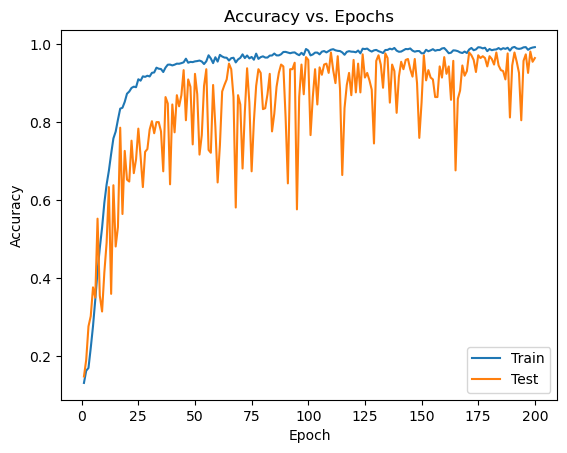

In [59]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=128, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
30/30 [==============================] - 11s 134ms/step - loss: 2.5814 - accuracy: 0.1480 - val_loss: 7.1010 - val_accuracy: 0.1167
Epoch 2/200
30/30 [==============================] - 3s 99ms/step - loss: 2.2092 - accuracy: 0.2270 - val_loss: 6.7198 - val_accuracy: 0.1167
Epoch 3/200
30/30 [==============================] - 3s 99ms/step - loss: 1.9676 - accuracy: 0.2993 - val_loss: 4.6559 - val_accuracy: 0.1238
Epoch 4/200
30/30 [==============================] - 3s 100ms/step - loss: 1.6326 - accuracy: 0.4044 - val_loss: 3.1583 - val_accuracy: 0.1548
Epoch 5/200
30/30 [==============================] - 3s 99ms/step - loss: 1.3589 - accuracy: 0.4881 - val_loss: 3.4680 - val_accuracy: 0.2024
Epoch 6/200
30/30 [==============================] - 3s 101ms/step - loss: 1.0484 - accuracy: 0.6065 - val_loss: 2.9079 - val_accuracy: 0.2524
Epoch 7/200
30/30 [==============================] - 3s 102ms/step - loss: 0.8083 - accuracy: 0.7058 - val_loss: 1.4216 - val_accuracy: 0.5167
E

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200


118/118 [==============================] - 15s 83ms/step - loss: 2.3767 - accuracy: 0.2079 - val_loss: 5.0993 - val_accuracy: 0.1190
Epoch 2/200
118/118 [==============================] - 9s 74ms/step - loss: 1.8323 - accuracy: 0.3469 - val_loss: 2.1242 - val_accuracy: 0.3214
Epoch 3/200
118/118 [==============================] - 8s 72ms/step - loss: 1.3728 - accuracy: 0.5024 - val_loss: 1.8113 - val_accuracy: 0.4214
Epoch 4/200
118/118 [==============================] - 9s 74ms/step - loss: 0.9155 - accuracy: 0.6854 - val_loss: 2.0176 - val_accuracy: 0.4619
Epoch 5/200
118/118 [==============================] - 9s 75ms/step - loss: 0.6246 - accuracy: 0.7945 - val_loss: 1.1407 - val_accuracy: 0.6571
Epoch 6/200
118/118 [==============================] - 9s 74ms/step - loss: 0.4476 - accuracy: 0.8562 - val_loss: 0.8670 - val_accuracy: 0.7262
Epoch 7/200
118/118 [==============================] - 9s 75ms/step - loss: 0.3725 - accuracy: 0.8840 - val_loss: 2.7393 - val_accura

In [5]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
118/118 [==============================] - 11s 74ms/step - loss: 2.3015 - accuracy: 0.1997 - val_loss: 4.0461 - val_accuracy: 0.1143
Epoch 2/200
118/118 [==============================] - 9s 72ms/step - loss: 1.6979 - accuracy: 0.3874 - val_loss: 1.9130 - val_accuracy: 0.3143
Epoch 3/200
118/118 [==============================] - 9s 77ms/step - loss: 1.2297 - accuracy: 0.5612 - val_loss: 1.5416 - val_accuracy: 0.5024
Epoch 4/200
118/118 [==============================] - 10s 84ms/step - loss: 0.8228 - accuracy: 0.7129 - val_loss: 1.8338 - val_accuracy: 0.5310
Epoch 5/200
118/118 [==============================] - 10s 82ms/step - loss: 0.5171 - accuracy: 0.8255 - val_loss: 1.5702 - val_accuracy: 0.5595
Epoch 6/200
118/118 [==============================] - 11s 91ms/step - loss: 0.4084 - accuracy: 0.8639 - val_loss: 1.2277 - val_accuracy: 0.6595
Epoch 7/200
118/118 [==============================] - 11s 93ms/step - loss: 0.3024 - accuracy: 0.9036 - val_loss: 1.9889 - val_accu

In [7]:
# Save the model
save_model(model,r"C:\Users\adwit\Downloads\cnn_models\my_model.h5")


C:\Users\adwit\AppData\Local\Temp\ipykernel_11124\4271439829.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,r"C:\Users\adwit\Downloads\cnn_models\my_model.h5")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Convert counts to percentages
conf_matrix_percentage = conf_matrix / np.sum(conf_matrix, axis=1)[:, np.newaxis]

# Plot confusion matrix in green colors
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_percentage, annot=True, cmap='Greens', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()
 

14/14 [==============================] - 0s 11ms/step


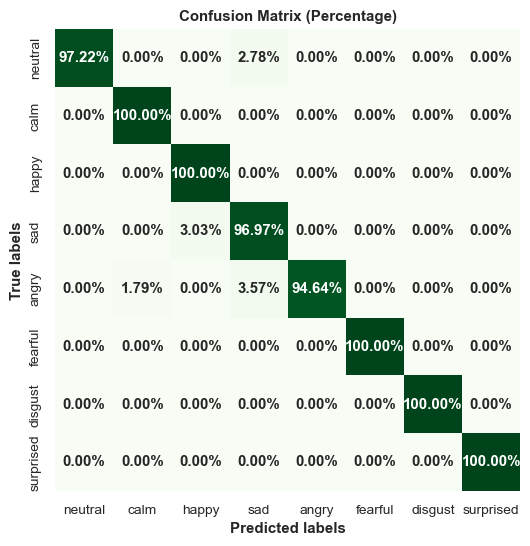

Confusion Matrix Counts:
[[0.97222222 0.         0.         0.02777778 0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.03030303 0.96969697 0.         0.
  0.         0.        ]
 [0.         0.01785714 0.         0.03571429 0.94642857 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\my_model.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict(X_test_co)
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test_co, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=0.9)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix (Percentage)', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


In [9]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=300, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/300
118/118 [==============================] - 10s 75ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0932 - val_accuracy: 0.9738
Epoch 2/300
118/118 [==============================] - 8s 70ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.1183 - val_accuracy: 0.9714
Epoch 3/300
118/118 [==============================] - 8s 69ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.2552 - val_accuracy: 0.9357
Epoch 4/300
118/118 [==============================] - 8s 69ms/step - loss: 0.0122 - accuracy: 0.9976 - val_loss: 0.2955 - val_accuracy: 0.9190
Epoch 5/300
118/118 [==============================] - 8s 70ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1836 - val_accuracy: 0.9548
Epoch 6/300
118/118 [==============================] - 8s 70ms/step - loss: 0.0181 - accuracy: 0.9958 - val_loss: 0.1747 - val_accuracy: 0.9690
Epoch 7/300
118/118 [==============================] - 8s 70ms/step - loss: 0.0224 - accuracy: 0.9952 - val_loss: 0.1769 - val_accuracy

Epoch 1/30
118/118 [==============================] - 20s 80ms/step - loss: 2.2661 - accuracy: 0.2140 - val_loss: 2.4155 - val_accuracy: 0.1571
Epoch 2/30
118/118 [==============================] - 9s 72ms/step - loss: 1.6347 - accuracy: 0.3983 - val_loss: 2.6030 - val_accuracy: 0.2952
Epoch 3/30
118/118 [==============================] - 8s 72ms/step - loss: 1.2142 - accuracy: 0.5575 - val_loss: 2.6143 - val_accuracy: 0.3667
Epoch 4/30
118/118 [==============================] - 9s 72ms/step - loss: 0.7914 - accuracy: 0.7150 - val_loss: 1.4417 - val_accuracy: 0.5357
Epoch 5/30
118/118 [==============================] - 9s 73ms/step - loss: 0.5179 - accuracy: 0.8279 - val_loss: 2.1982 - val_accuracy: 0.5190
Epoch 6/30
118/118 [==============================] - 9s 73ms/step - loss: 0.4266 - accuracy: 0.8607 - val_loss: 1.2125 - val_accuracy: 0.7143
Epoch 7/30
118/118 [==============================] - 9s 73ms/step - loss: 0.2936 - accuracy: 0.9033 - val_loss: 1.1033 - val_accuracy: 0.681

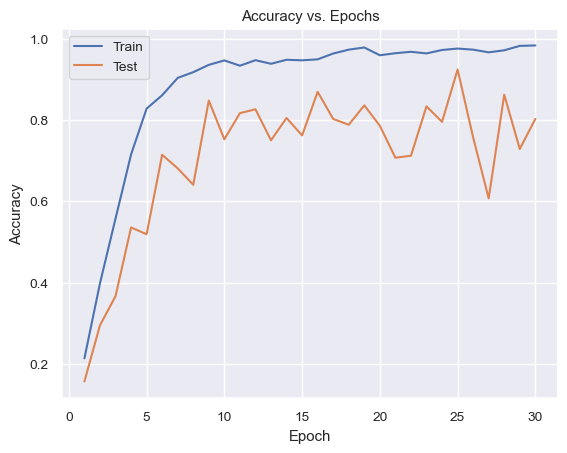

In [11]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=30, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/60
118/118 [==============================] - 12s 79ms/step - loss: 2.2780 - accuracy: 0.2071 - val_loss: 4.7781 - val_accuracy: 0.1429
Epoch 2/60
118/118 [==============================] - 9s 77ms/step - loss: 1.6356 - accuracy: 0.4025 - val_loss: 4.1595 - val_accuracy: 0.2500
Epoch 3/60
118/118 [==============================] - 9s 74ms/step - loss: 1.1446 - accuracy: 0.5866 - val_loss: 1.1043 - val_accuracy: 0.6333
Epoch 4/60
118/118 [==============================] - 10s 83ms/step - loss: 0.7608 - accuracy: 0.7423 - val_loss: 4.0450 - val_accuracy: 0.3167
Epoch 5/60
118/118 [==============================] - 9s 79ms/step - loss: 0.4639 - accuracy: 0.8440 - val_loss: 1.5810 - val_accuracy: 0.5905
Epoch 6/60
118/118 [==============================] - 9s 80ms/step - loss: 0.3688 - accuracy: 0.8792 - val_loss: 0.7140 - val_accuracy: 0.7667
Epoch 7/60
118/118 [==============================] - 9s 80ms/step - loss: 0.2637 - accuracy: 0.9160 - val_loss: 1.3710 - val_accuracy: 0.67

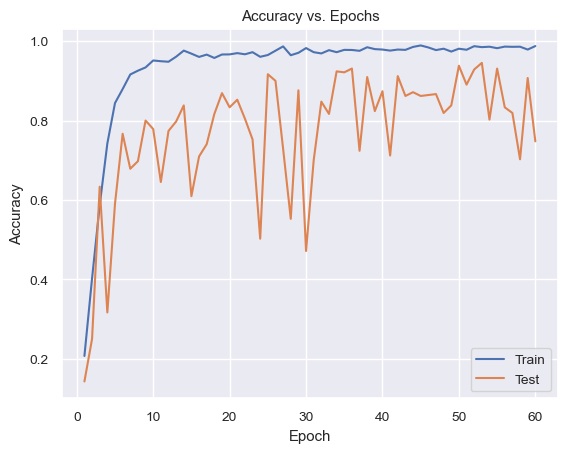

In [13]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=60, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAcomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/90
118/118 [==============================] - 16s 79ms/step - loss: 2.3060 - accuracy: 0.2129 - val_loss: 3.9565 - val_accuracy: 0.1452
Epoch 2/90
118/118 [==============================] - 9s 75ms/step - loss: 1.7443 - accuracy: 0.3636 - val_loss: 2.0341 - val_accuracy: 0.3167
Epoch 3/90
118/118 [==============================] - 10s 81ms/step - loss: 1.2131 - accuracy: 0.5596 - val_loss: 1.4975 - val_accuracy: 0.4571
Epoch 4/90
118/118 [==============================] - 10s 89ms/step - loss: 0.8481 - accuracy: 0.6894 - val_loss: 1.5241 - val_accuracy: 0.5024
Epoch 5/90
118/118 [==============================] - 11s 91ms/step - loss: 0.5682 - accuracy: 0.8024 - val_loss: 2.2356 - val_accuracy: 0.4667
Epoch 6/90
118/118 [==============================] - 12s 103ms/step - loss: 0.3800 - accuracy: 0.8726 - val_loss: 1.3820 - val_accuracy: 0.6619
Epoch 7/90
118/118 [==============================] - 13s 108ms/step - loss: 0.3089 - accuracy: 0.8983 - val_loss: 2.1814 - val_accuracy

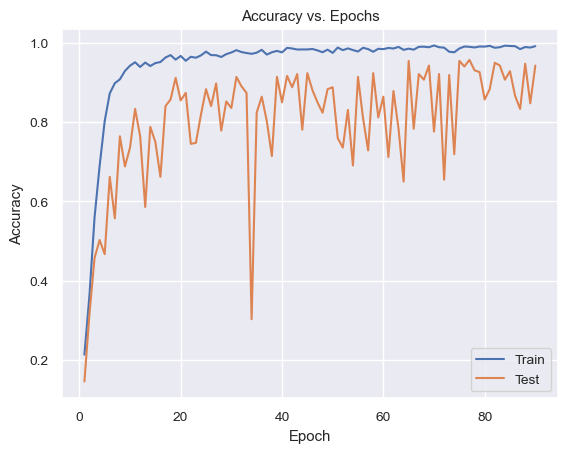

In [15]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=90, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [18]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (5,5), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)


num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 128, 128, 64)         1792      ['input_6[0][0]']             
                                                                                            

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Stack the features along a new axis
# The axis argument in np.stack specifies the axis along which to stack the arrays
stacked_features = np.stack((spectrogram_features, chromagram_features), axis=-1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

# Encode the labels using a LabelBinarizer
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(stacked_features, labels_encoded, test_size=0.1, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(18,18,256,2)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
print(X_train_co.shape)

(3776, 18, 18, 256, 2)


Epoch 1/200


118/118 [==============================] - 26s 176ms/step - loss: 2.2946 - accuracy: 0.2188 - val_loss: 2.9620 - val_accuracy: 0.1762
Epoch 2/200
118/118 [==============================] - 15s 130ms/step - loss: 1.6931 - accuracy: 0.3991 - val_loss: 2.3094 - val_accuracy: 0.3071
Epoch 3/200
118/118 [==============================] - 15s 123ms/step - loss: 1.2386 - accuracy: 0.5585 - val_loss: 2.7567 - val_accuracy: 0.3667
Epoch 4/200
118/118 [==============================] - 14s 118ms/step - loss: 0.8393 - accuracy: 0.7148 - val_loss: 1.4160 - val_accuracy: 0.5833
Epoch 5/200
118/118 [==============================] - 13s 109ms/step - loss: 0.5643 - accuracy: 0.8016 - val_loss: 1.1449 - val_accuracy: 0.6762
Epoch 6/200
118/118 [==============================] - 13s 112ms/step - loss: 0.4073 - accuracy: 0.8671 - val_loss: 1.2577 - val_accuracy: 0.6286
Epoch 7/200
118/118 [==============================] - 15s 125ms/step - loss: 0.3197 - accuracy: 0.8983 - val_loss: 0.9763

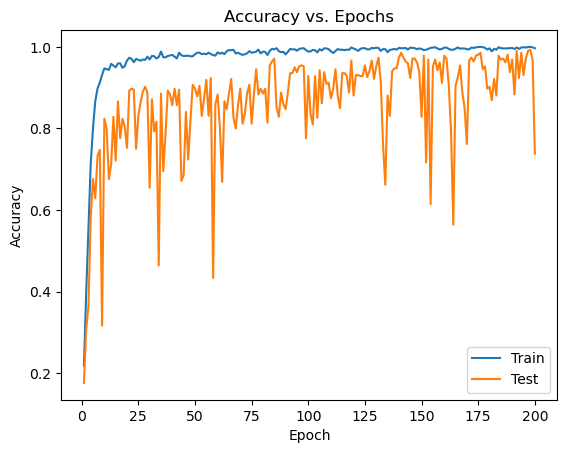

In [5]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/100
118/118 [==============================] - 9s 76ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 2.1189 - val_accuracy: 0.5857
Epoch 2/100
118/118 [==============================] - 9s 72ms/step - loss: 0.0143 - accuracy: 0.9947 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 3/100
118/118 [==============================] - 8s 72ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.1030 - val_accuracy: 0.9690
Epoch 4/100
118/118 [==============================] - 8s 71ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 1.0095 - val_accuracy: 0.7548
Epoch 5/100
118/118 [==============================] - 8s 72ms/step - loss: 0.0293 - accuracy: 0.9915 - val_loss: 0.8281 - val_accuracy: 0.7786
Epoch 6/100
118/118 [==============================] - 8s 72ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0755 - val_accuracy: 0.9714
Epoch 7/100
118/118 [==============================] - 8s 71ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0508 - val_accuracy:

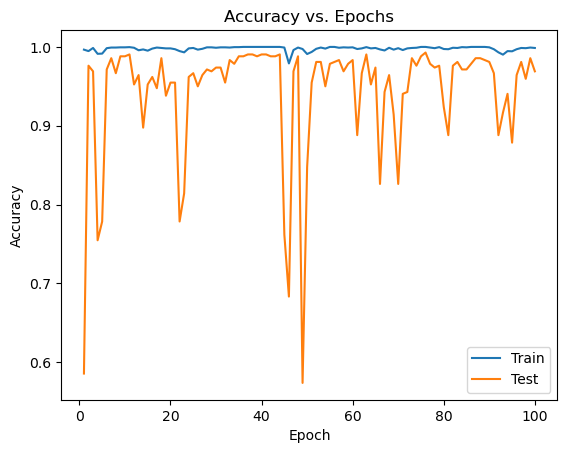

In [6]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=100, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Load extracted spectrographic features
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labelsnewest224.npy")

# Encode the labels using a LabelBinarizer
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(spectrogram_features, labels_encoded, test_size=0.1, random_state=42)


In [2]:
print(X_train_co.shape)

(3776, 18, 18, 256)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(18,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200


118/118 [==============================] - 9s 43ms/step - loss: 2.4336 - accuracy: 0.1663 - val_loss: 2.7090 - val_accuracy: 0.1190
Epoch 2/200
118/118 [==============================] - 5s 40ms/step - loss: 2.1513 - accuracy: 0.2153 - val_loss: 2.0358 - val_accuracy: 0.1881
Epoch 3/200
118/118 [==============================] - 5s 39ms/step - loss: 1.9315 - accuracy: 0.2797 - val_loss: 1.8335 - val_accuracy: 0.3071
Epoch 4/200
118/118 [==============================] - 5s 40ms/step - loss: 1.7614 - accuracy: 0.3374 - val_loss: 1.7445 - val_accuracy: 0.3762
Epoch 5/200
118/118 [==============================] - 5s 39ms/step - loss: 1.5814 - accuracy: 0.4086 - val_loss: 2.0882 - val_accuracy: 0.3476
Epoch 6/200
118/118 [==============================] - 5s 39ms/step - loss: 1.4395 - accuracy: 0.4725 - val_loss: 1.6054 - val_accuracy: 0.4429
Epoch 7/200
118/118 [==============================] - 5s 39ms/step - loss: 1.2920 - accuracy: 0.5344 - val_loss: 1.6729 - val_accurac

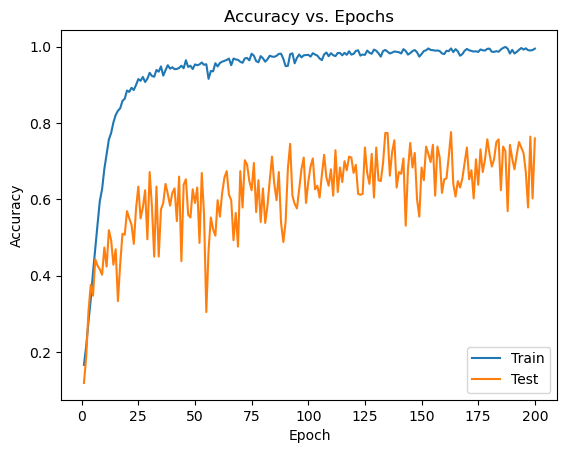

In [4]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Load extracted spectrographic features
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

# Encode the labels using a LabelBinarizer
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(chromagram_features, labels_encoded, test_size=0.1, random_state=42)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(18,18,256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200
118/118 [==============================] - 7s 39ms/step - loss: 2.0969 - accuracy: 0.2781 - val_loss: 4.1758 - val_accuracy: 0.1667
Epoch 2/200
118/118 [==============================] - 4s 37ms/step - loss: 1.3104 - accuracy: 0.5305 - val_loss: 2.5551 - val_accuracy: 0.2452
Epoch 3/200
118/118 [==============================] - 4s 37ms/step - loss: 0.7401 - accuracy: 0.7471 - val_loss: 2.7914 - val_accuracy: 0.3476
Epoch 4/200
118/118 [==============================] - 4s 37ms/step - loss: 0.4346 - accuracy: 0.8543 - val_loss: 1.8761 - val_accuracy: 0.5143
Epoch 5/200
118/118 [==============================] - 4s 37ms/step - loss: 0.3220 - accuracy: 0.8962 - val_loss: 0.9880 - val_accuracy: 0.6976
Epoch 6/200
118/118 [==============================] - 4s 37ms/step - loss: 0.1965 - accuracy: 0.9407 - val_loss: 0.9038 - val_accuracy: 0.7667
Epoch 7/200
118/118 [==============================] - 4s 37ms/step - loss: 0.2003 - accuracy: 0.9386 - val_loss: 0.7862 - val_accuracy:

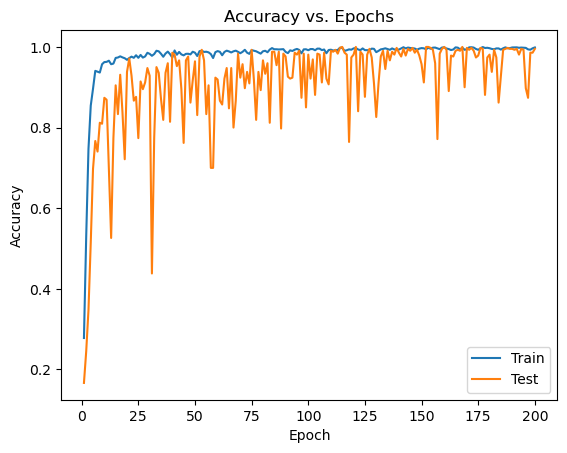

In [9]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
spectrograms

Epoch 1/200
118/118 [==============================] - 8s 40ms/step - loss: 2.3734 - accuracy: 0.1909 - val_loss: 2.2197 - val_accuracy: 0.1619
Epoch 2/200
118/118 [==============================] - 4s 37ms/step - loss: 1.9556 - accuracy: 0.2873 - val_loss: 1.8812 - val_accuracy: 0.2548
Epoch 3/200
118/118 [==============================] - 4s 37ms/step - loss: 1.7312 - accuracy: 0.3570 - val_loss: 1.8733 - val_accuracy: 0.3095
Epoch 4/200
118/118 [==============================] - 4s 38ms/step - loss: 1.4883 - accuracy: 0.4555 - val_loss: 1.7589 - val_accuracy: 0.4476
Epoch 5/200
118/118 [==============================] - 4s 37ms/step - loss: 1.2914 - accuracy: 0.5193 - val_loss: 2.0220 - val_accuracy: 0.3905
Epoch 6/200
118/118 [==============================] - 4s 37ms/step - loss: 1.1057 - accuracy: 0.5874 - val_loss: 1.5351 - val_accuracy: 0.4643
Epoch 7/200
118/118 [==============================] - 4s 37ms/step - loss: 0.9503 - accuracy: 0.6592 - val_loss: 1.7388 - val_accuracy:

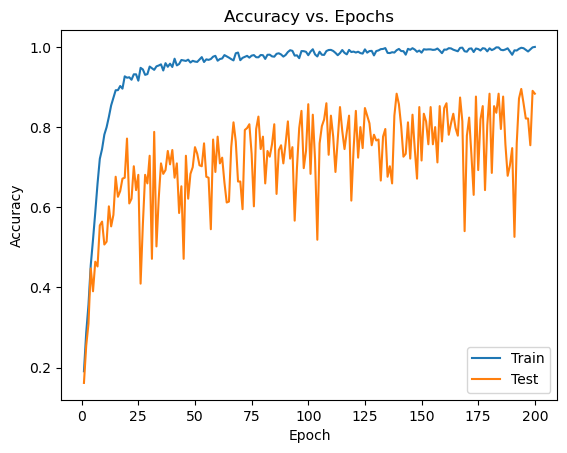

In [12]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()
